<a href="https://colab.research.google.com/github/Chukwugude/Machine-Learning-projects/blob/main/Predicting_employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting employee attrition using machine learning

## Import relevant libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from matplotlib import pyplot
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



In [45]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [46]:
df.T

0                       1     \
Age                                    41                      49   
Attrition                             Yes                      No   
BusinessTravel              Travel_Rarely       Travel_Frequently   
DailyRate                            1102                     279   
Department                          Sales  Research & Development   
DistanceFromHome                        1                       8   
Education                               2                       1   
EducationField              Life Sciences           Life Sciences   
EmployeeCount                           1                       1   
EmployeeNumber                          1                       2   
EnvironmentSatisfaction                 2                       3   
Gender                             Female                    Male   
HourlyRate                             94                      61   
JobInvolvement                          3                       2   
JobLevel                                2                       2   
JobRole                   Sales Executive      Research Scientist   
JobSatisfaction                         4                       2   
MaritalStatus                      Single                 Married   
MonthlyIncome                        5993                    5130   
MonthlyRate                         19479                   24907   
NumCompaniesWorked                      8                       1   
Over18                                  Y                       Y   
OverTime                              Yes                      No   
PercentSalaryHike                      11                      23   
PerformanceRating                       3                       4   
RelationshipSatisfaction                1                       4   
StandardHours                          80                      80   
StockOptionLevel                        0                       1   
TotalWorkingYears                       8                      10   
TrainingTimesLastYear                   0                       3   
WorkLifeBalance                         1                       3   
YearsAtCompany                          6                      10   
YearsInCurrentRole                      4                       7   
YearsSinceLastPromotion                 0                       1   
YearsWithCurrManager                    5                       7   

                                            2                       3     \
Age                                           37                      33   
Attrition                                    Yes                      No   
BusinessTravel                     Travel_Rarely       Travel_Frequently   
DailyRate                                   1373                    1392   
Department                Research & Development  Research & Development   
DistanceFromHome                               2                       3   
Education                                      2                       4   
EducationField                             Other           Life Sciences   
EmployeeCount                                  1                       1   
EmployeeNumber                                 4                       5   
EnvironmentSatisfaction                        4                       4   
Gender                                      Male                  Female   
HourlyRate                                    92                      56   
JobInvolvement                                 2                       3   
JobLevel                                       1                       1   
JobRole                    Laboratory Technician      Research Scientist   
JobSatisfaction                                3                       3   
MaritalStatus                             Single                 Married   
MonthlyIncome                               2090                    2909   
MonthlyRate                     

In [47]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [48]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [49]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [50]:
#Number of rows,columns of dataset
df.shape

(1470, 35)

In [51]:
#checking for missing values
df.isna() .sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [52]:
#Checking for duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [53]:
#Dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
numerical_features=list(df.select_dtypes(include=['float64','int64']).columns)
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [55]:
categorical_features=list(df.select_dtypes(exclude=['float64','int64']).columns)
categorical_features


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [56]:
# Convert

In [57]:
# Handling inconsistent data. Some variables are supposed to be categorical, but their data type is numerical. Therefore, we need to convert their data type to categorical.
features_to_convert=list(('WorkLifeBalance', 'StockOptionLevel' ,'RelationshipSatisfaction' ,'PerformanceRating' ,'JobSatisfaction' ,'JobInvolvement','EnvironmentSatisfaction','Education','JobLevel'))
df[features_to_convert] = df[features_to_convert].astype('object')

In [58]:
features_to_convert

['WorkLifeBalance',
 'StockOptionLevel',
 'RelationshipSatisfaction',
 'PerformanceRating',
 'JobSatisfaction',
 'JobInvolvement',
 'EnvironmentSatisfaction',
 'Education',
 'JobLevel']

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [60]:
# Mapping the categorical features
# Updated mapping dictionaries with integer labels
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelors', 4: 'Masters', 5: 'Doctorate'}
environment_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_level_map = {1: 'Entry', 2: 'Junior', 3: 'Mid-Level', 4: 'Senior', 5: 'Executive'}
job_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating_map = { 3: 'High', 4: 'Excellent'}
relationship_satisfaction_map = {1: 'Low satisfaction', 2: 'Medium satisfaction', 3: 'high satisfaction', 4: 'Very high satisfaction'}
stock_option_map = {0: 'No stock options', 1: 'Stock options at a discount', 2: 'Stock options at a market price', 3: 'Stock options at a premium price'}
work_life_balance_map = {1: 'Not satisfied', 2: 'Satisfied', 3: 'Very satisfied', 4: 'Highly satisfied'}


# Apply mappings to the DataFrame
df['Education'] = df['Education'].map(education_map)
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(environment_satisfaction_map)
df['JobInvolvement'] = df['JobInvolvement'].map(job_involvement_map)
df['JobLevel'] = df['JobLevel'].map(job_level_map)
df['JobSatisfaction'] = df['JobSatisfaction'].map(job_satisfaction_map)
df['PerformanceRating'] = df['PerformanceRating'].map(performance_rating_map)
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(relationship_satisfaction_map)
df['StockOptionLevel'] = df['StockOptionLevel'].map(stock_option_map)
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(work_life_balance_map)




In [61]:
# New numerical features
numerical_features=list(df.select_dtypes(include=['float64','int64']).columns)
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [62]:
df.isna() .sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [63]:
df.describe().T

count          mean          std     min      25%  \
Age                      1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.00   
EmployeeCount            1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber           1470.0   1024.865306   602.024335     1.0   491.25   
HourlyRate               1470.0     65.891156    20.329428    30.0    48.00   
MonthlyIncome            1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate              1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked       1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike        1470.0     15.209524     3.659938    11.0    12.00   
StandardHours            1470.0     80.000000     0.000000    80.0    80.00   
TotalWorkingYears        1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear    1470.0      2.799320     1.289271     0.0     2.00   
YearsAtCompany           1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole       1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion  1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager     1470.0      4.123129     3.568136     0.0     2.00   

                             50%       75%      max  
Age                         36.0     43.00     60.0  
DailyRate                  802.0   1157.00   1499.0  
DistanceFromHome             7.0     14.00     29.0  
EmployeeCount                1.0      1.00      1.0  
EmployeeNumber            1020.5   1555.75   2068.0  
HourlyRate                  66.0     83.75    100.0  
MonthlyIncome             4919.0   8379.00  19999.0  
MonthlyRate              14235.5  20461.50  26999.0  
NumCompaniesWorked           2.0      4.00      9.0  
PercentSalaryHike           14.0     18.00     25.0  
StandardHours               80.0     80.00     80.0  
TotalWorkingYears           10.0     15.00     40.0  
TrainingTimesLastYear        3.0      3.00      6.0  
YearsAtCompany               5.0      9.00     40.0  
YearsInCurrentRole           3.0      7.00     18.0  
YearsSinceLastPromotion      1.0      3.00     15.0  
YearsWithCurrManager         3.0      7.00     17.0

In [64]:
# New categorical variables
categorical_features = list(df.select_dtypes(exclude=['float64','int64']).columns)
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [65]:
# Printing unique values
for cat in categorical_features:
    unique_vals = df[cat].unique()
    print(f"The unique values in '{cat}' variable are:")
    print(" ")
    for val in unique_vals:
        print(val)
    print("\n")

The unique values in 'Attrition' variable are:
 
Yes
No


The unique values in 'BusinessTravel' variable are:
 
Travel_Rarely
Travel_Frequently
Non-Travel


The unique values in 'Department' variable are:
 
Sales
Research & Development
Human Resources


The unique values in 'Education' variable are:
 
College
Below College
Masters
Bachelors
Doctorate


The unique values in 'EducationField' variable are:
 
Life Sciences
Other
Medical
Marketing
Technical Degree
Human Resources


The unique values in 'EnvironmentSatisfaction' variable are:
 
Medium
High
Very High
Low


The unique values in 'Gender' variable are:
 
Female
Male


The unique values in 'JobInvolvement' variable are:
 
High
Medium
Very High
Low


The unique values in 'JobLevel' variable are:
 
Junior
Entry
Mid-Level
Senior
Executive


The unique values in 'JobRole' variable are:
 
Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Dire

In [66]:
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

# Exploratory data analysis

## Univariate analysis

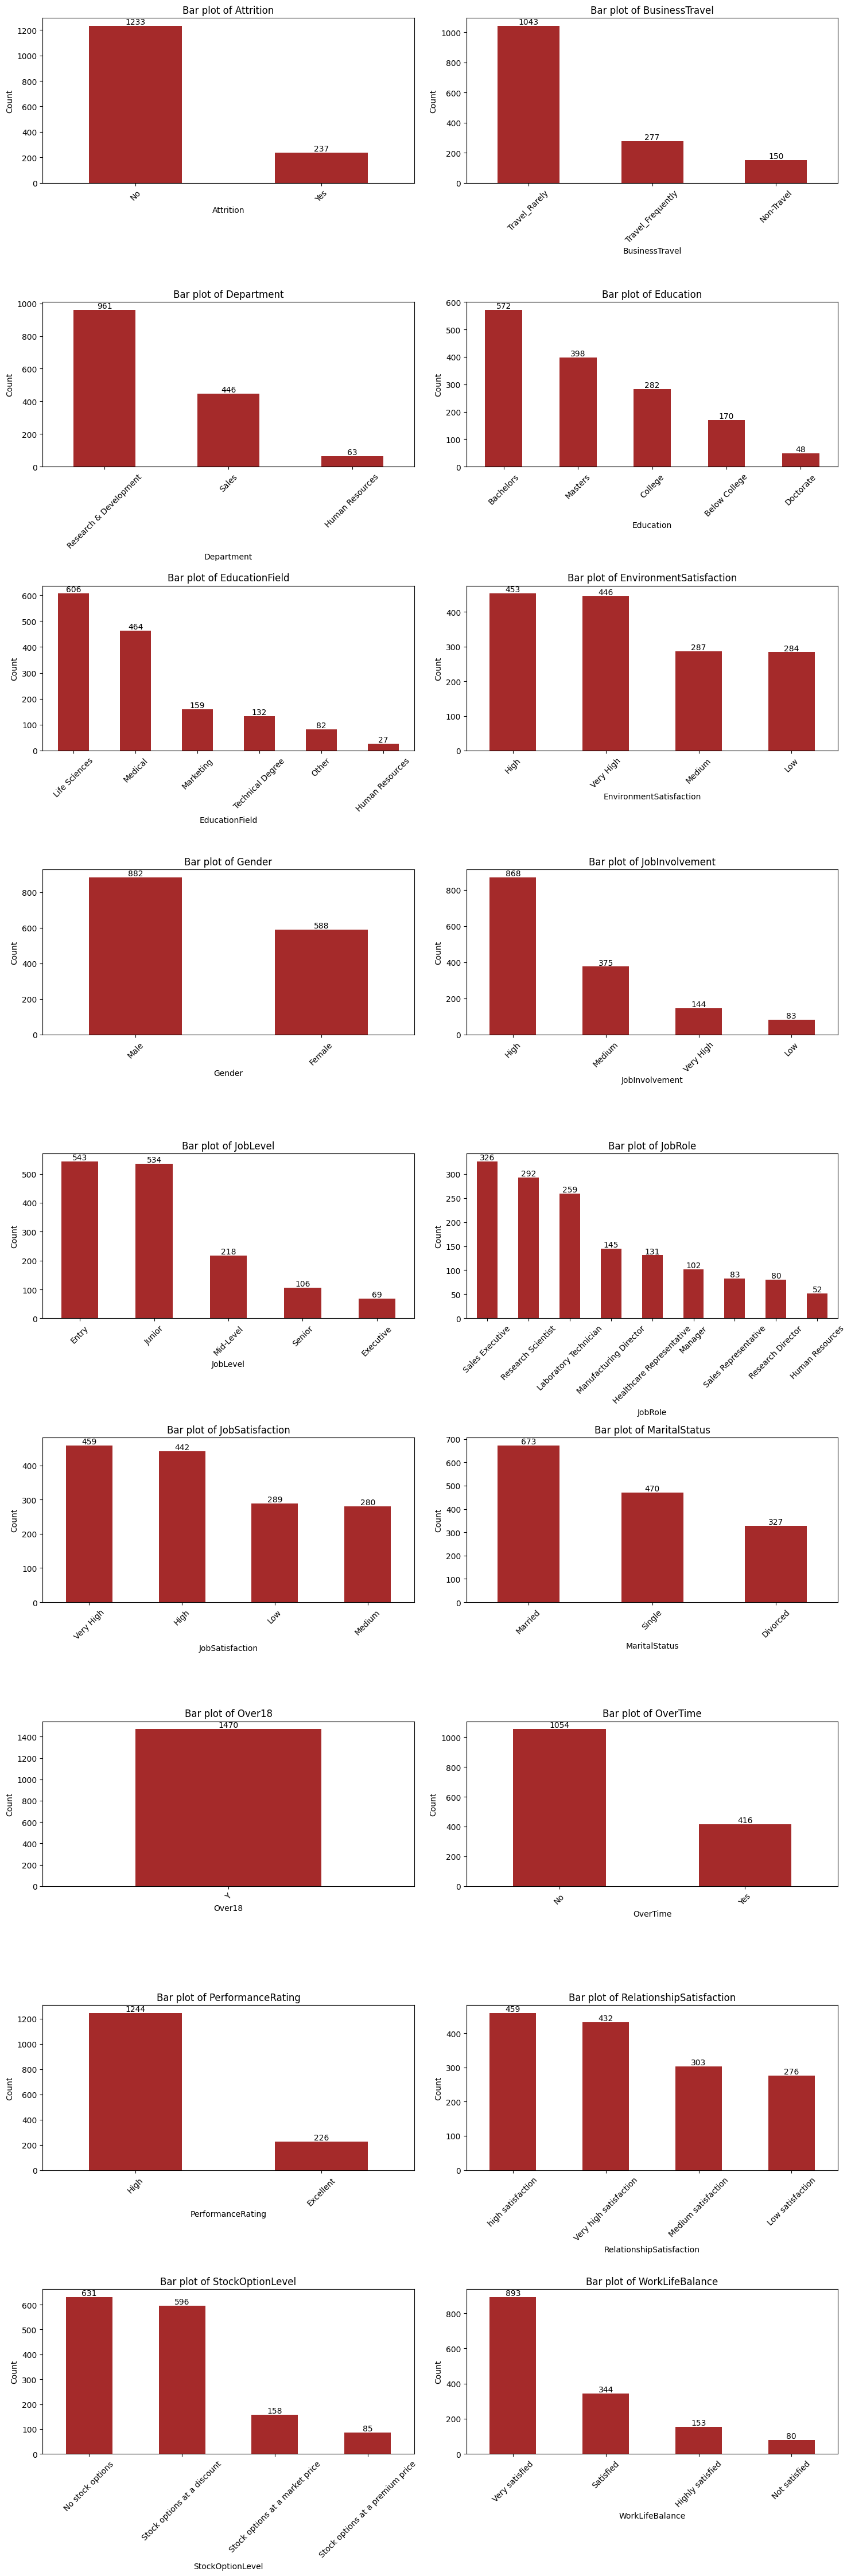

In [67]:
#Bar plot of categorical variables
# Calculate the number of rows and columns for subplots
num_cols = len(categorical_features)
num_rows = (num_cols + 1) // 2  # Ensure at least 2 rows

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

# Flatten the axes array
axes = axes.flatten()

# Plot each categorical column as a bar plot
for i, column in enumerate(categorical_features):
    counts = df[column].value_counts()
    ax = axes[i]
    counts.plot(kind='bar', ax=ax, color='brown')
    ax.set_title(f'Bar plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

    # Annotate counts on top of each bar
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')

# Remove empty subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

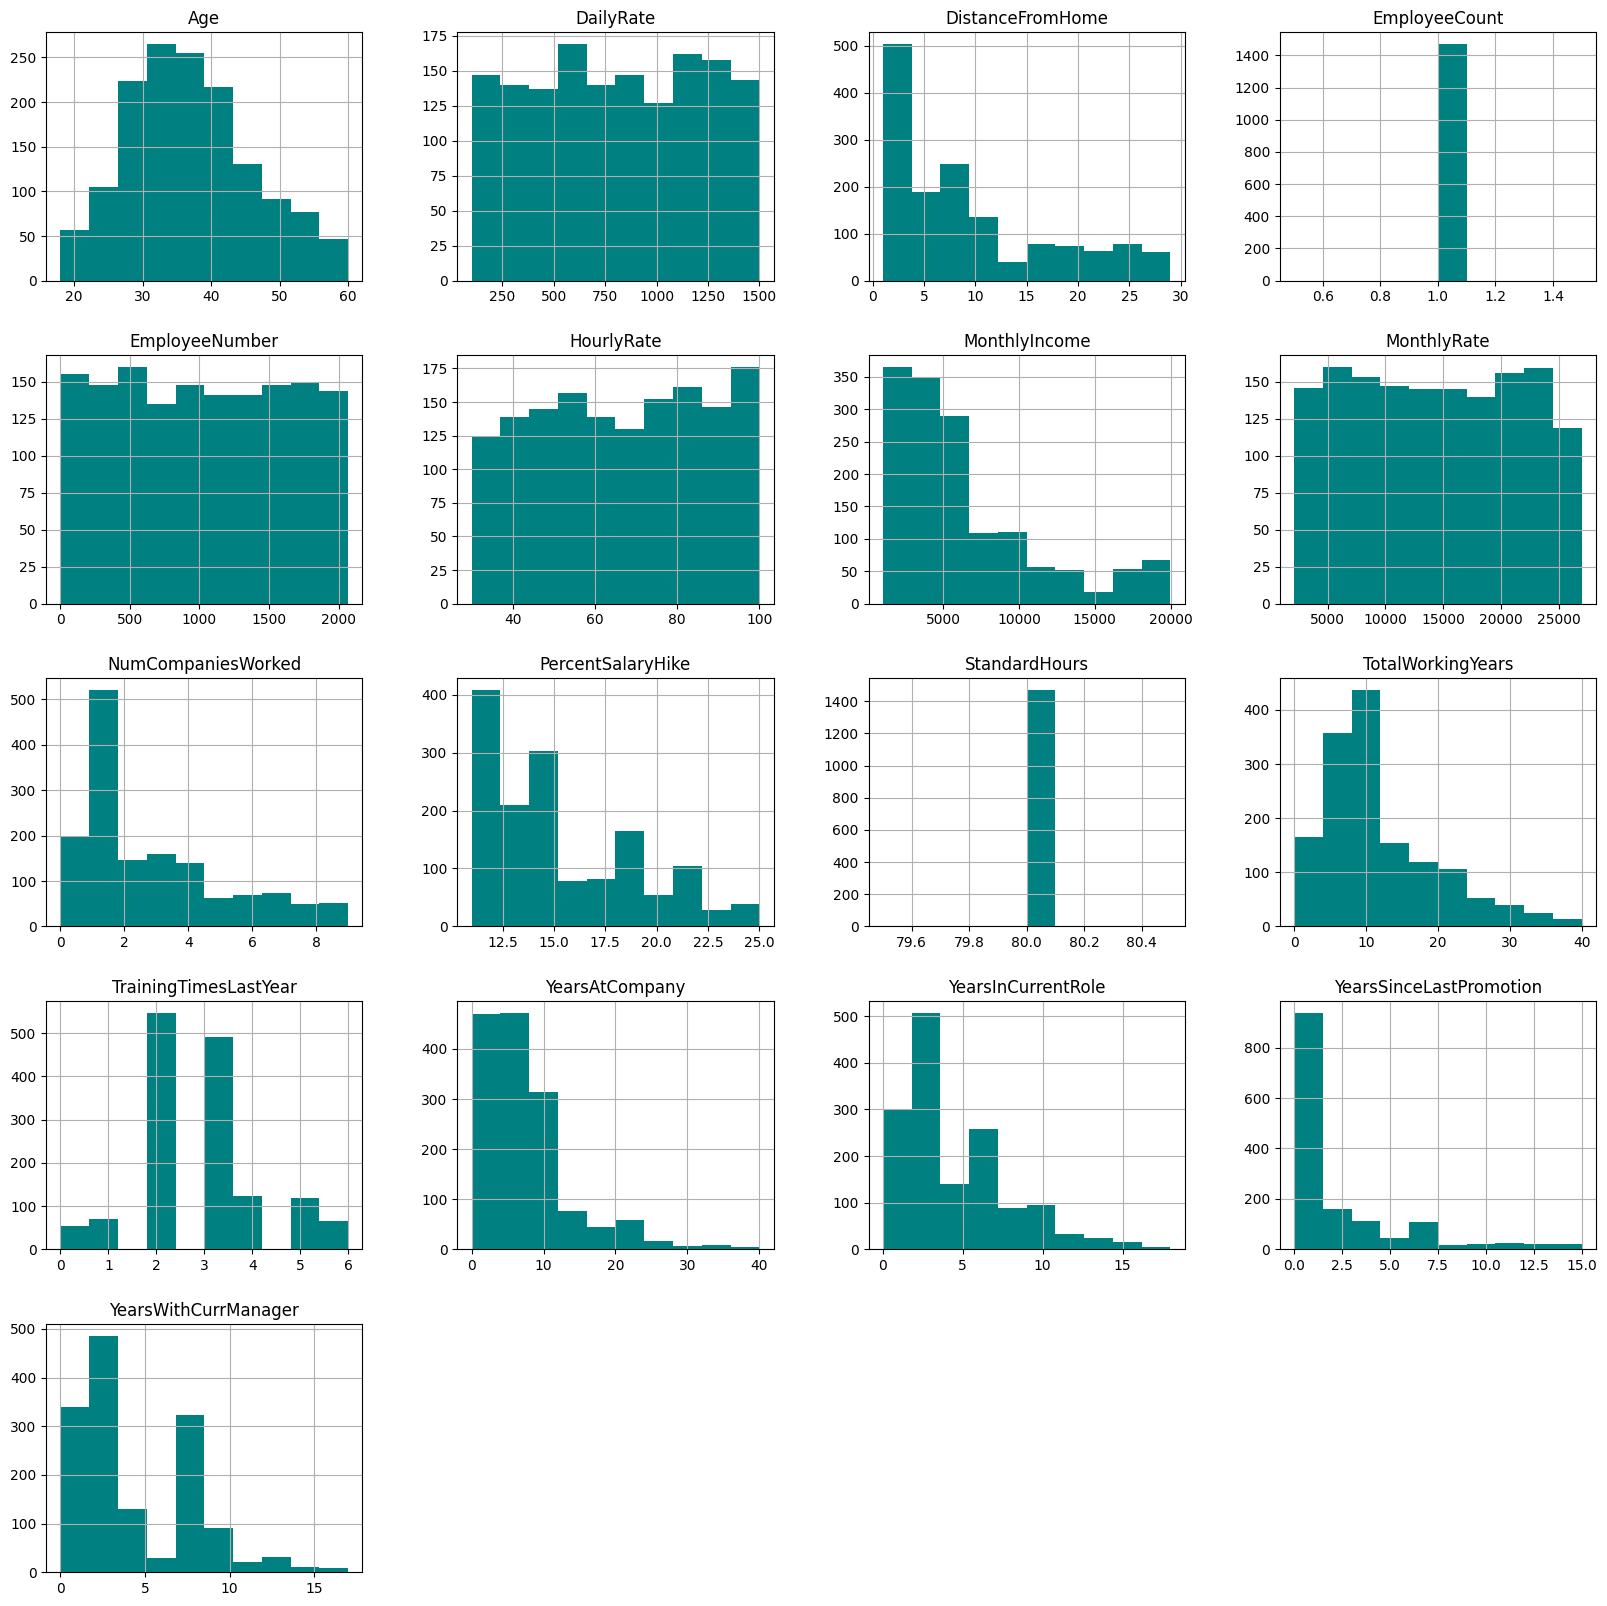

In [68]:
# Histogram of numerical values
df.hist(figsize=(20, 20), color='teal')
plt.show()

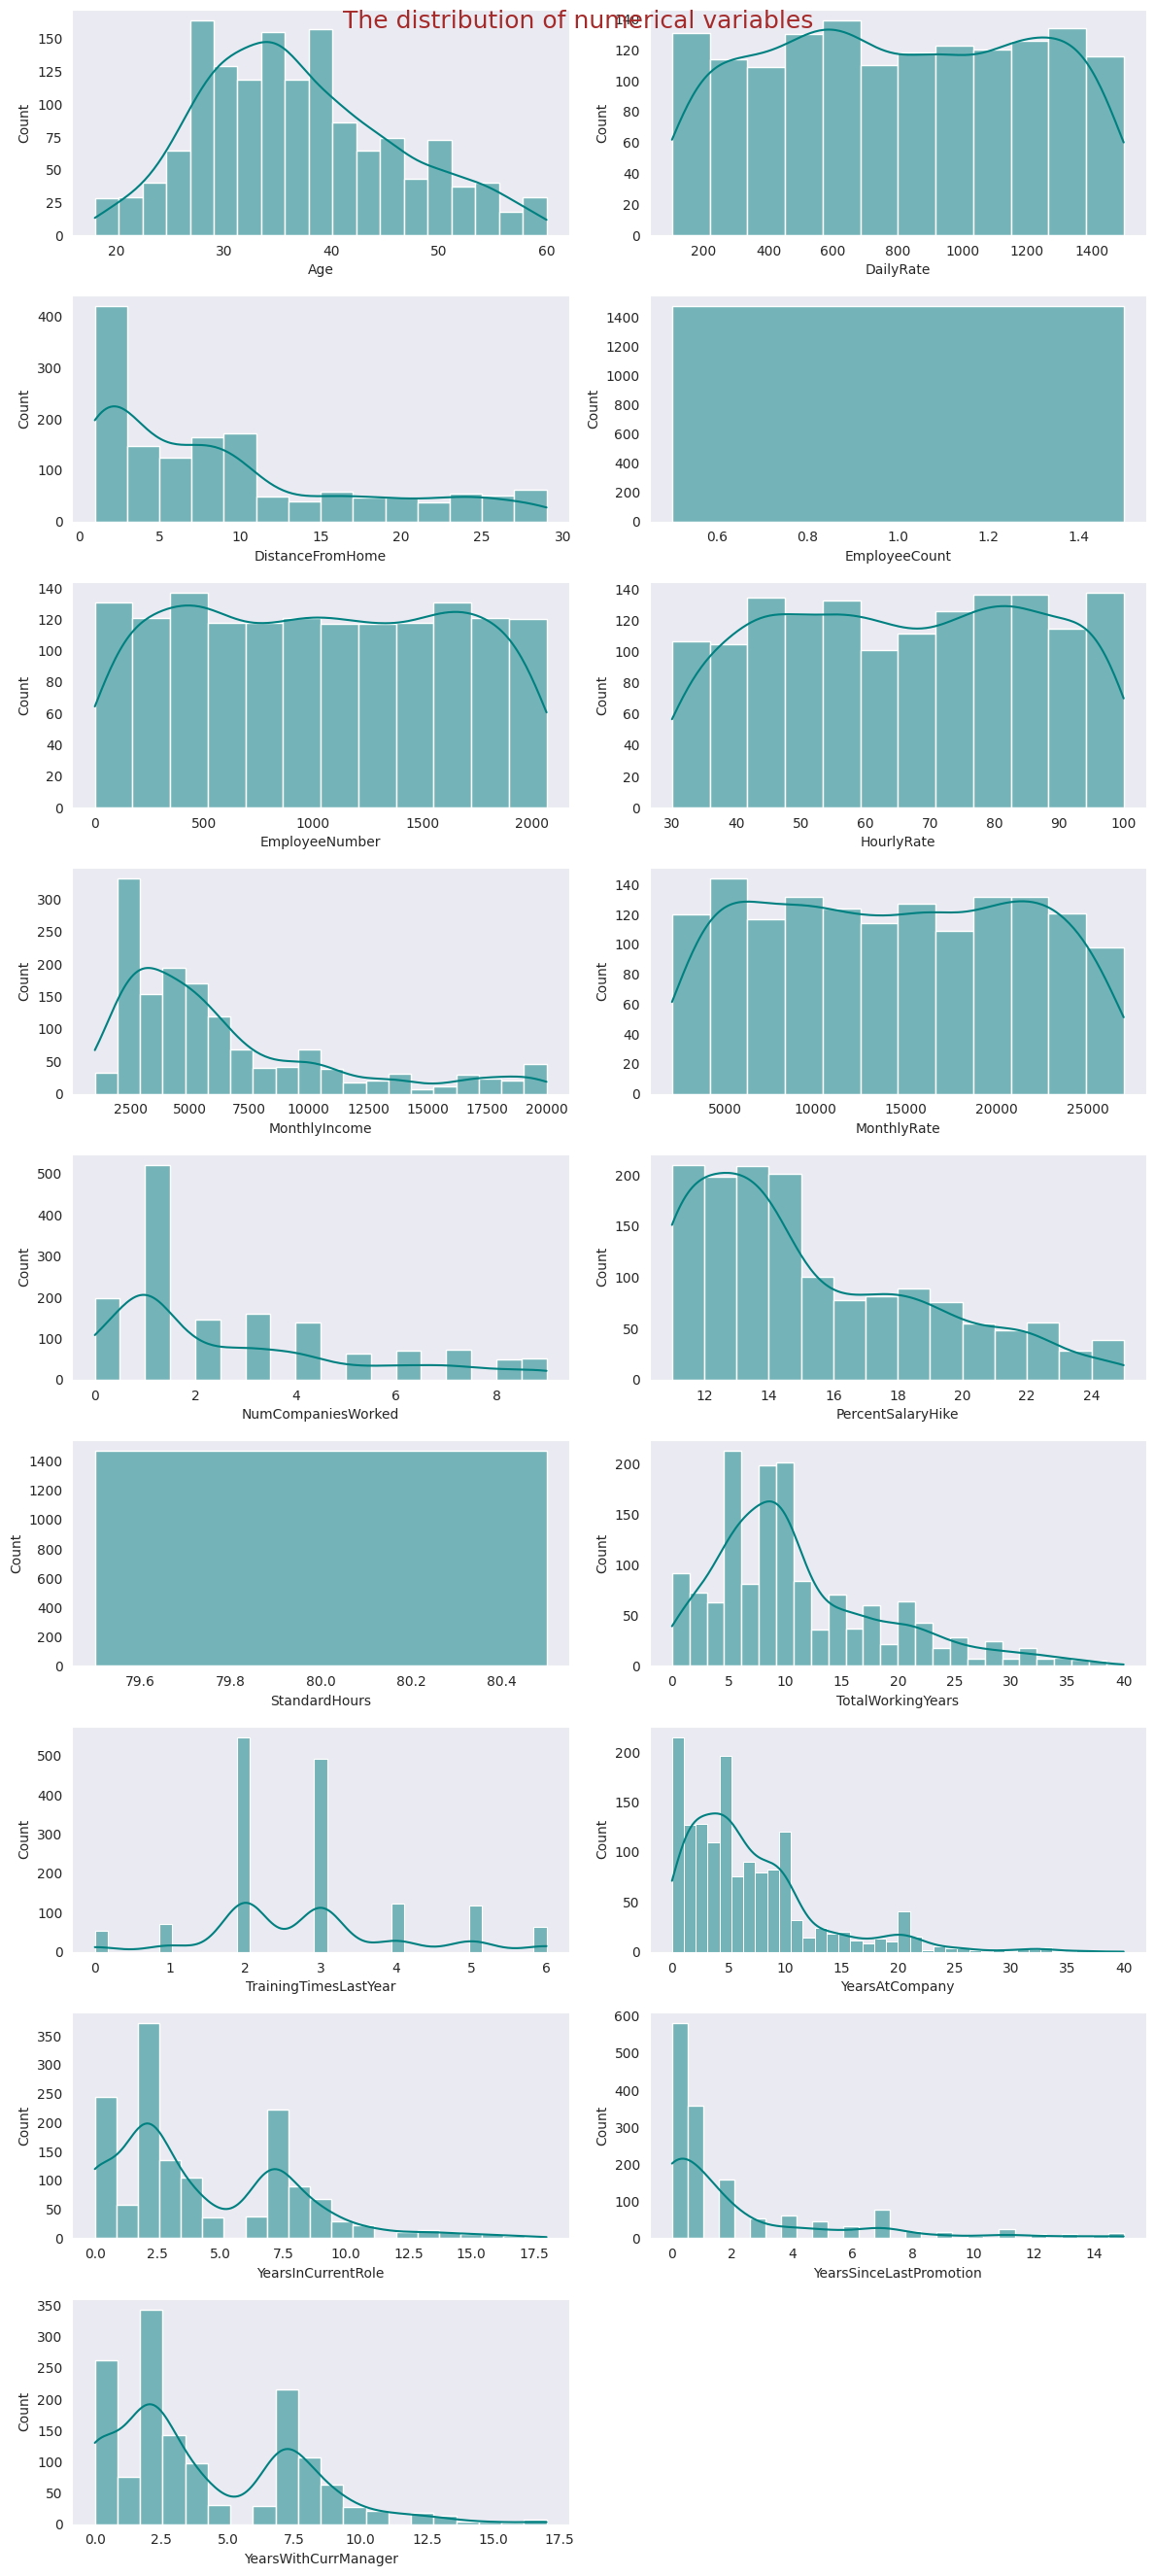

In [69]:
# The distribution of new numerical variables
sns.set_style('dark')
num_features = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(num_features)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

plt.figure(figsize=(12, 3*num_rows))
for i, col in enumerate(num_features):
    ax = plt.subplot(num_rows, 2, i+1)
    sns.histplot(data=df, x=col, ax=ax, color='teal', kde=True)

plt.suptitle('The distribution of numerical variables', fontsize=18, fontweight='light', color='Brown')
plt.tight_layout()
plt.show()


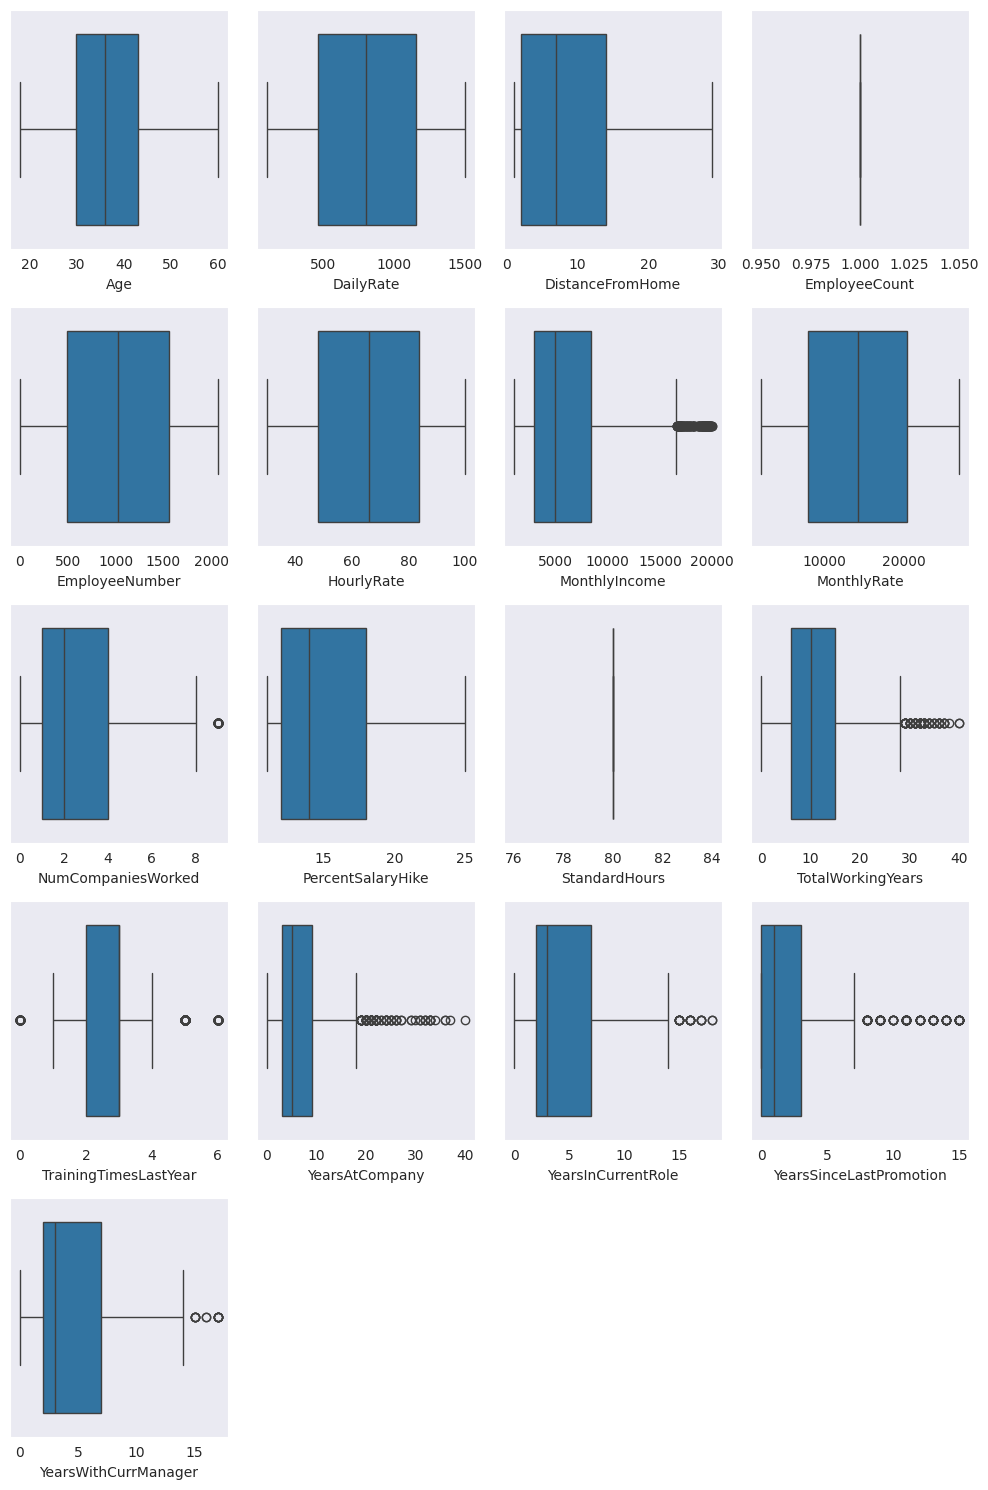

In [70]:
# Boxplot of numerical values
num_plots = len(numerical_features)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 15))
axes = axes.flatten()

for i, column in enumerate(numerical_features):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_xlabel(column)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bivariate analysis

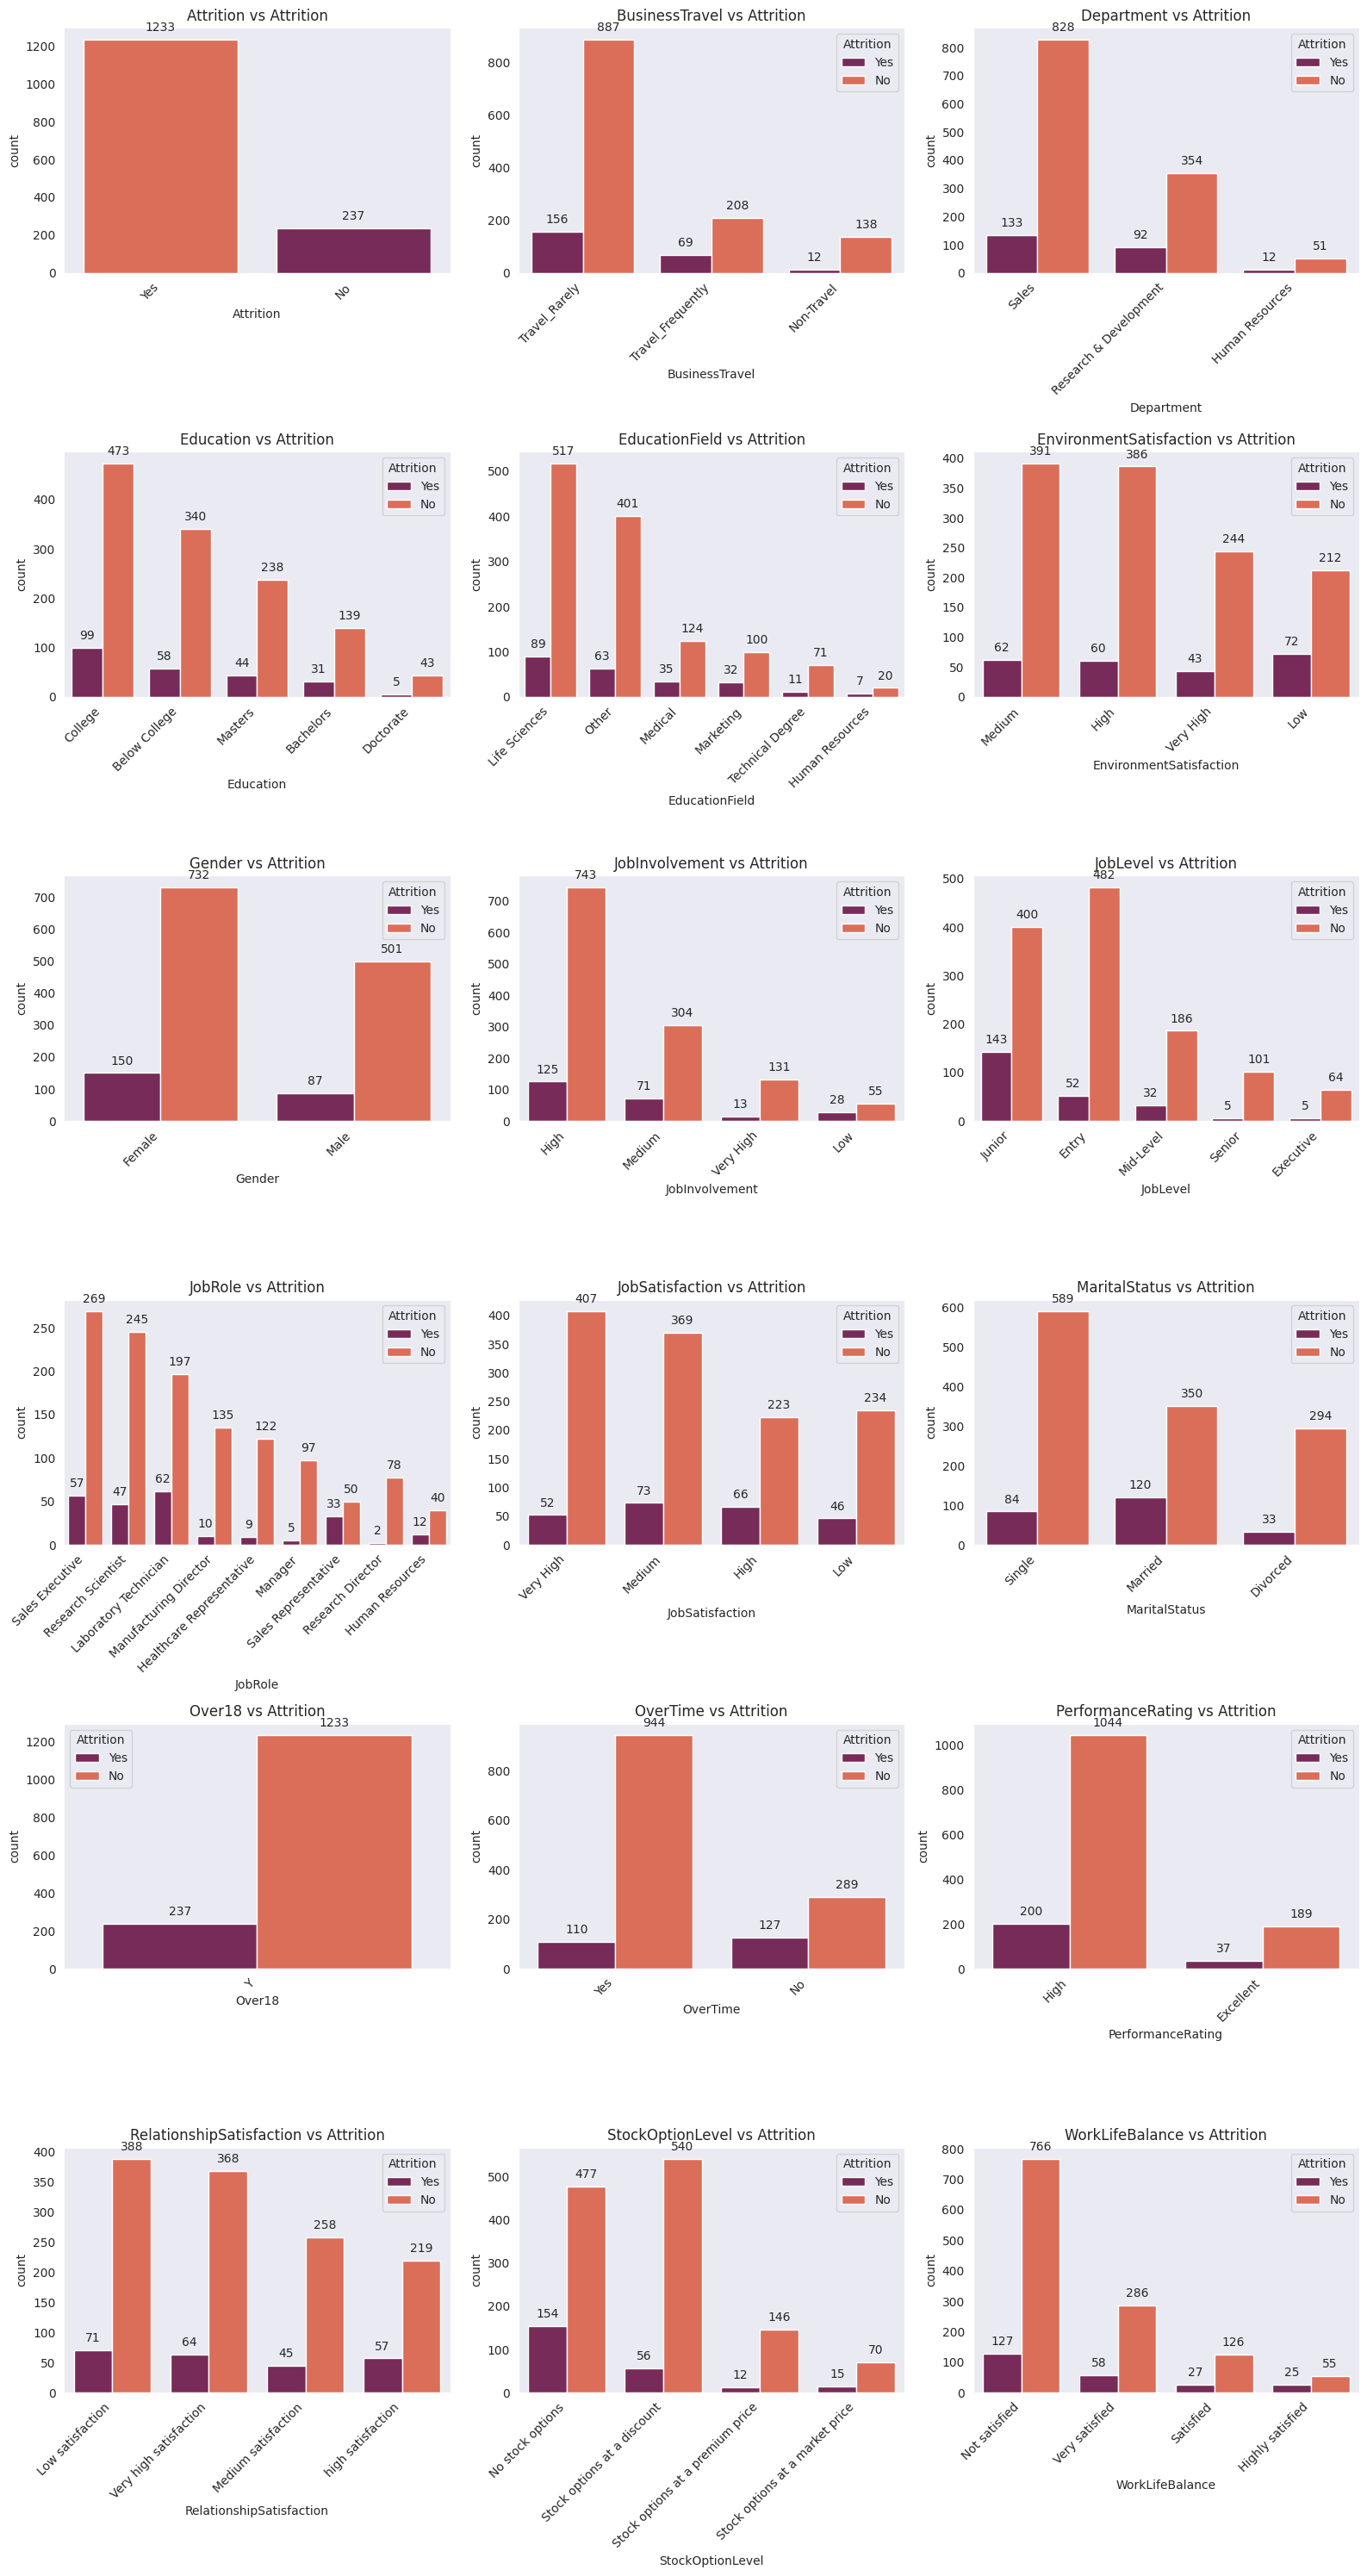

In [71]:
#Categorical features against Attrition
# Calculate the number of rows and columns needed for subplots
num_features = len(categorical_features)
num_cols = 3  # Assuming you want 3 columns of subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, 5*num_rows))

# Flatten the axis array
ax = np.ravel(ax)

# Iterate over each categorical feature and corresponding axis
for i, (column, axis) in enumerate(zip(categorical_features, ax)):
    sns.countplot(data=df, x=column, hue="Attrition", ax=axis, palette="rocket", order=df[column].value_counts().index)
    axis.set_xticks(np.arange(len(df[column].unique())))  # Set explicit tick positions
    axis.set_xticklabels(labels=df[column].unique(), rotation=45, ha='right')
    axis.set_title(f"{column} vs Attrition")

    # Add numbers of attrition on top of each bar
    for p in axis.patches:
        if p.get_height() > 0:
            axis.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

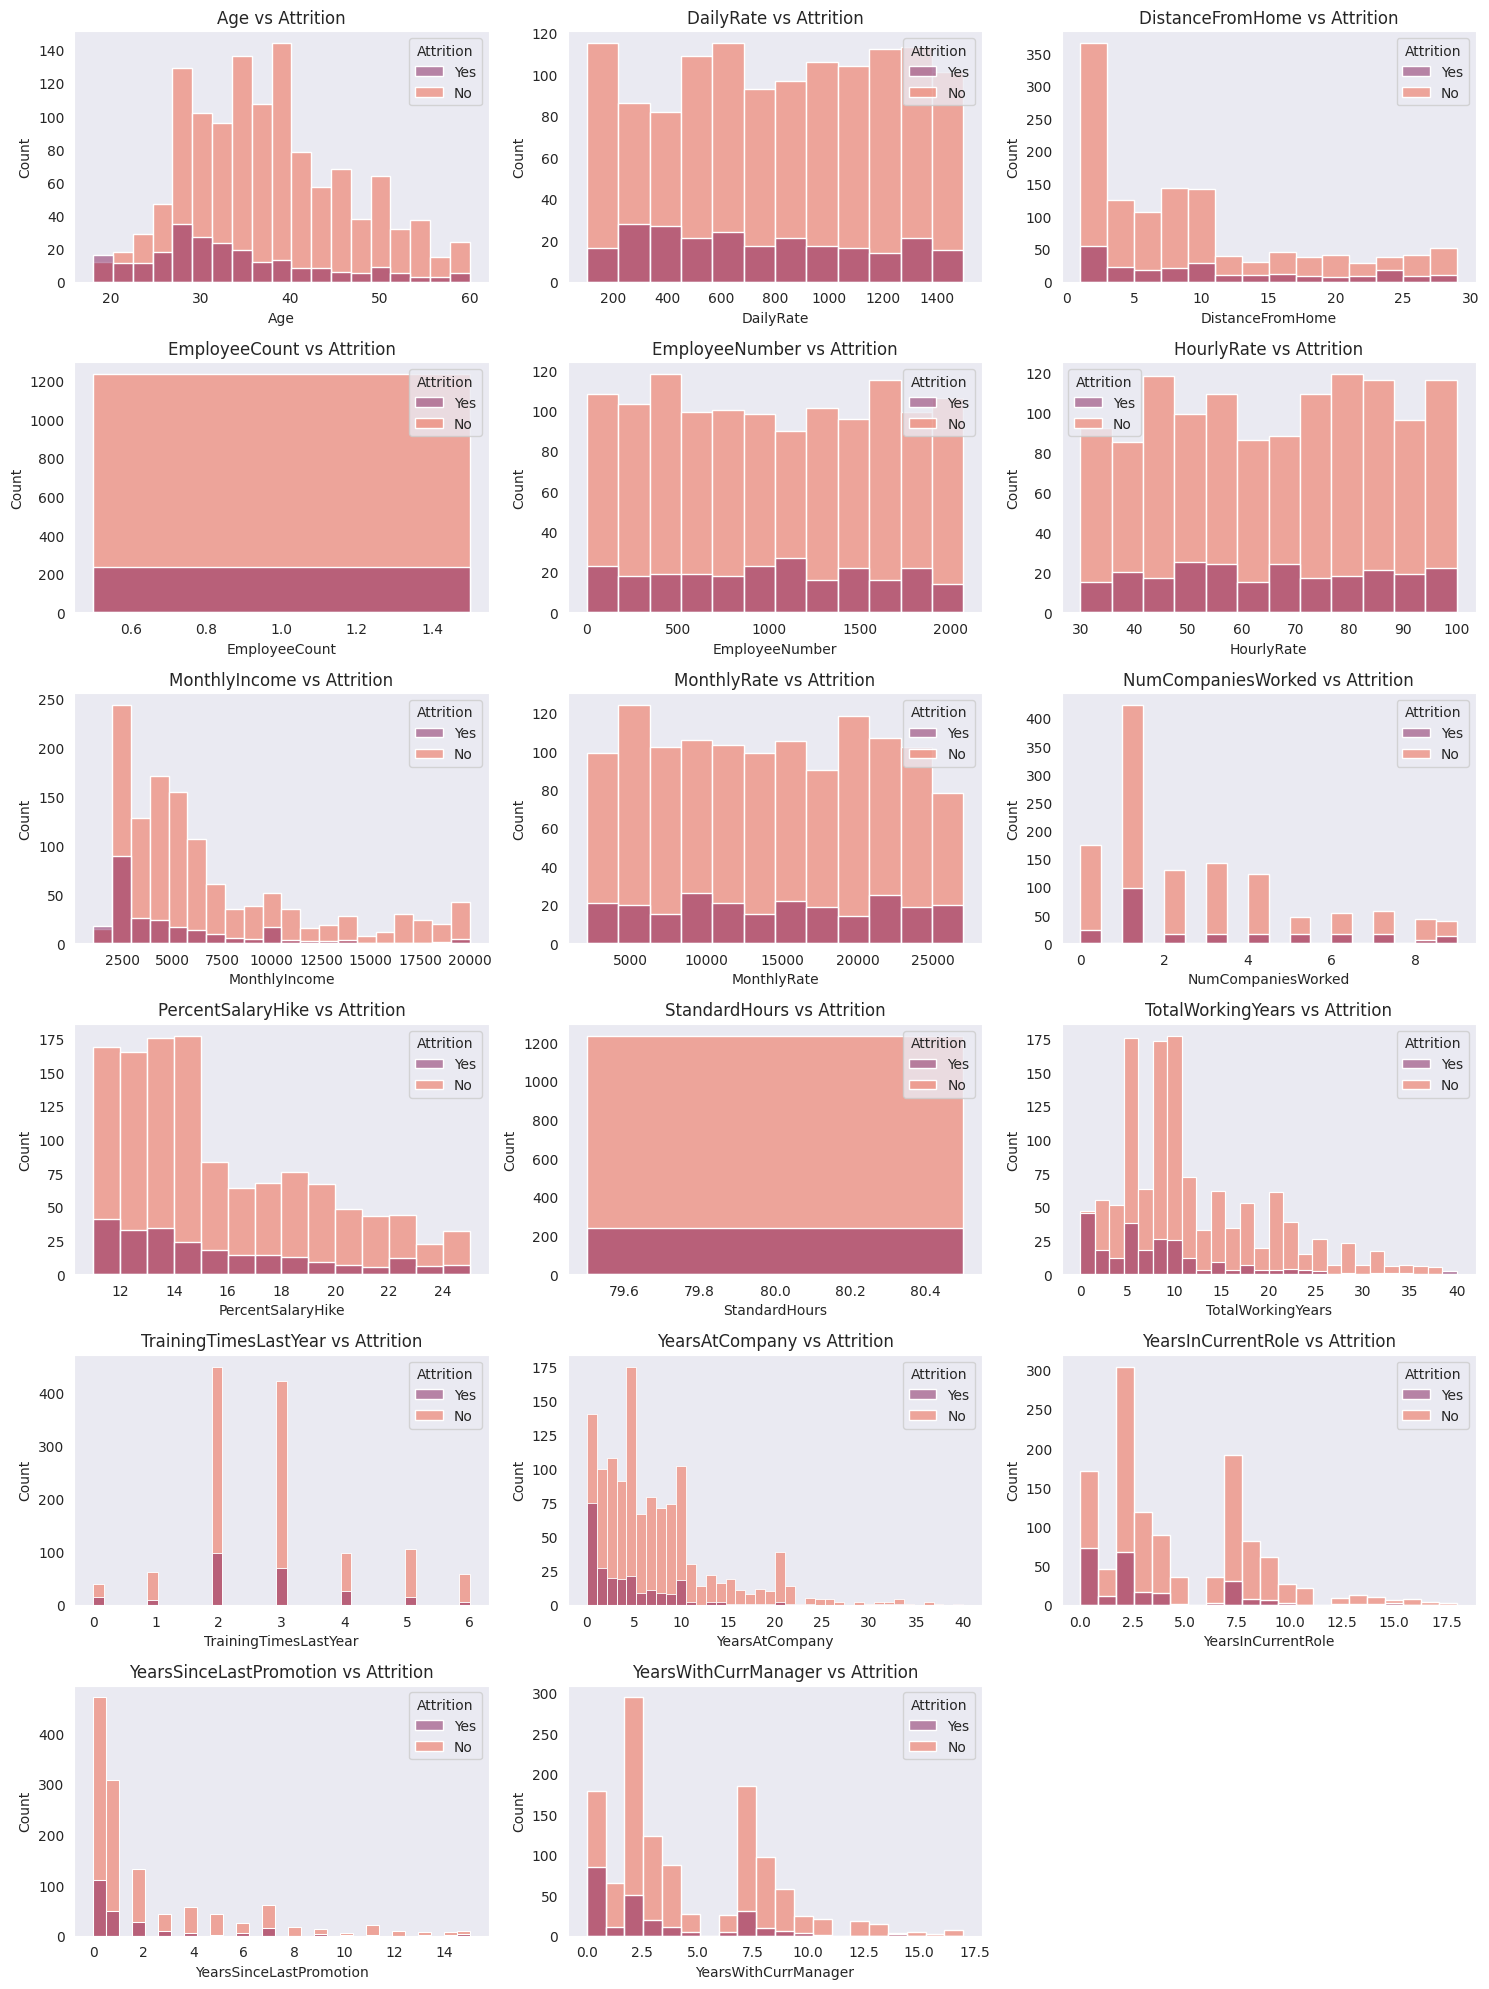

In [72]:
#Numerical variables against Attrition
# Extract numerical columns from the DataFrame
Numerical_columns = df.select_dtypes(include=np.number).columns

# Calculate the number of required rows and columns for subplots
num_cols = 3
num_rows = len(Numerical_columns) // num_cols + (len(Numerical_columns) % num_cols > 0)

# Create subplots
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axis array
ax = ax.flatten()

# Iterate over each numerical column
for i, column in enumerate(Numerical_columns):
    sns.histplot(data=df, x=column, hue="Attrition", ax=ax[i], palette="rocket")
    ax[i].set_title(f"{column} vs Attrition")

# Remove empty subplots
for i in range(len(Numerical_columns), len(ax)):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()
plt.show()

## Multivariate Analysis

<Figure size 1000x600 with 0 Axes>

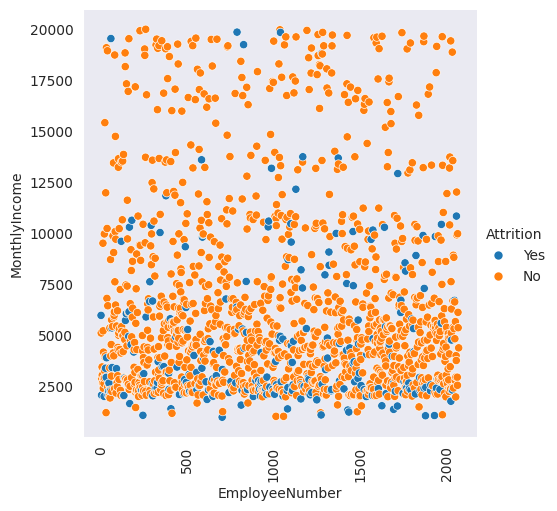

In [73]:
plt.figure(figsize=(10, 6))
sns.relplot(data=df, x="EmployeeNumber", y="MonthlyIncome", hue="Attrition")
plt.xticks(rotation=90)
plt.show()


<Figure size 500x1000 with 0 Axes>

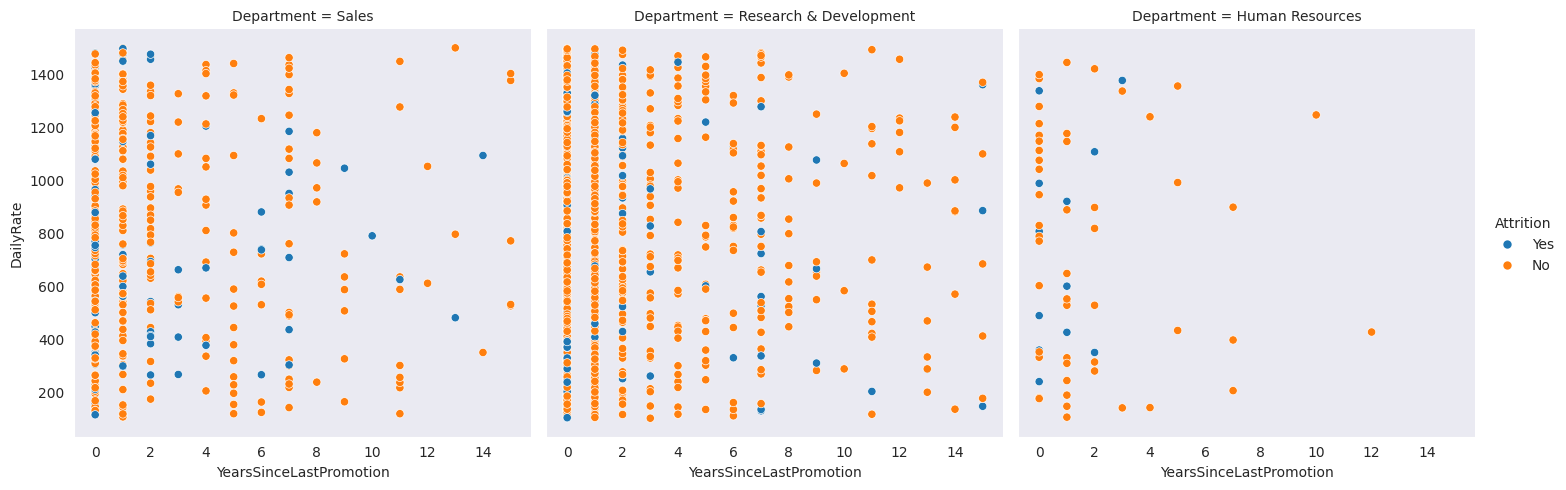

In [74]:
#DailyRate vs Department vs YearsSinceLastPromotion vs Attrition
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="DailyRate", x="YearsSinceLastPromotion", hue="Attrition",col='Department')
plt.show()

<Figure size 500x1000 with 0 Axes>

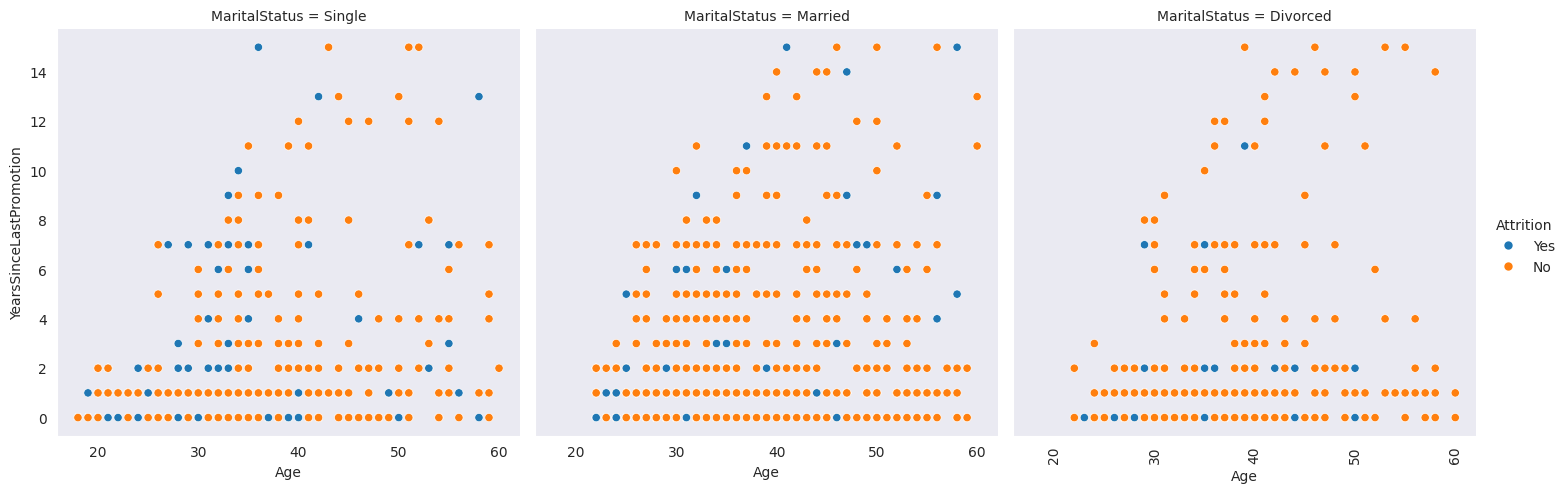

In [75]:
#YearsSinceLastPromotion vs Age vs Attrition vs MaritalStatus
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="YearsSinceLastPromotion", x="Age", hue="Attrition",col='MaritalStatus')
plt.xticks(rotation=90)
plt.show()

<Figure size 500x1000 with 0 Axes>

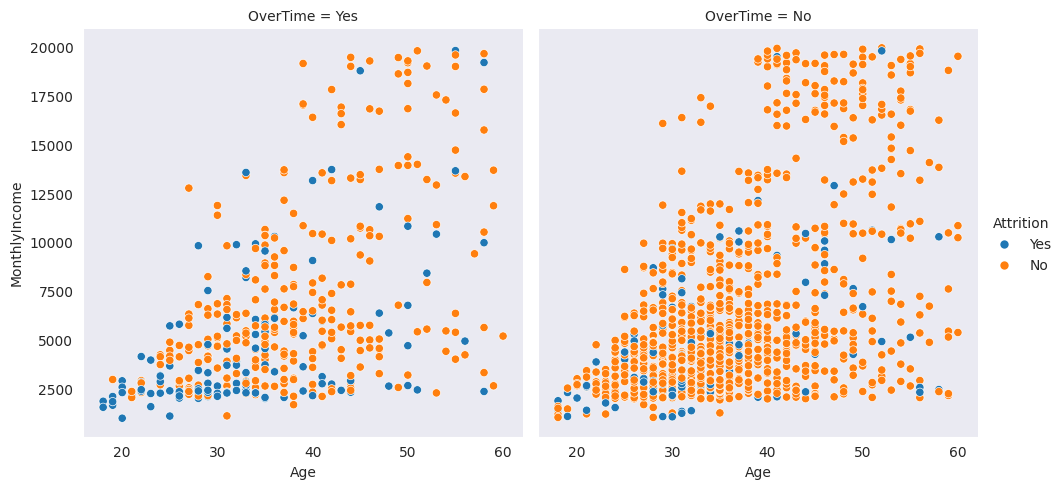

In [76]:
# MonthlyIncome vs Age vs Attrition vs OverTime
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='OverTime')
plt.show()

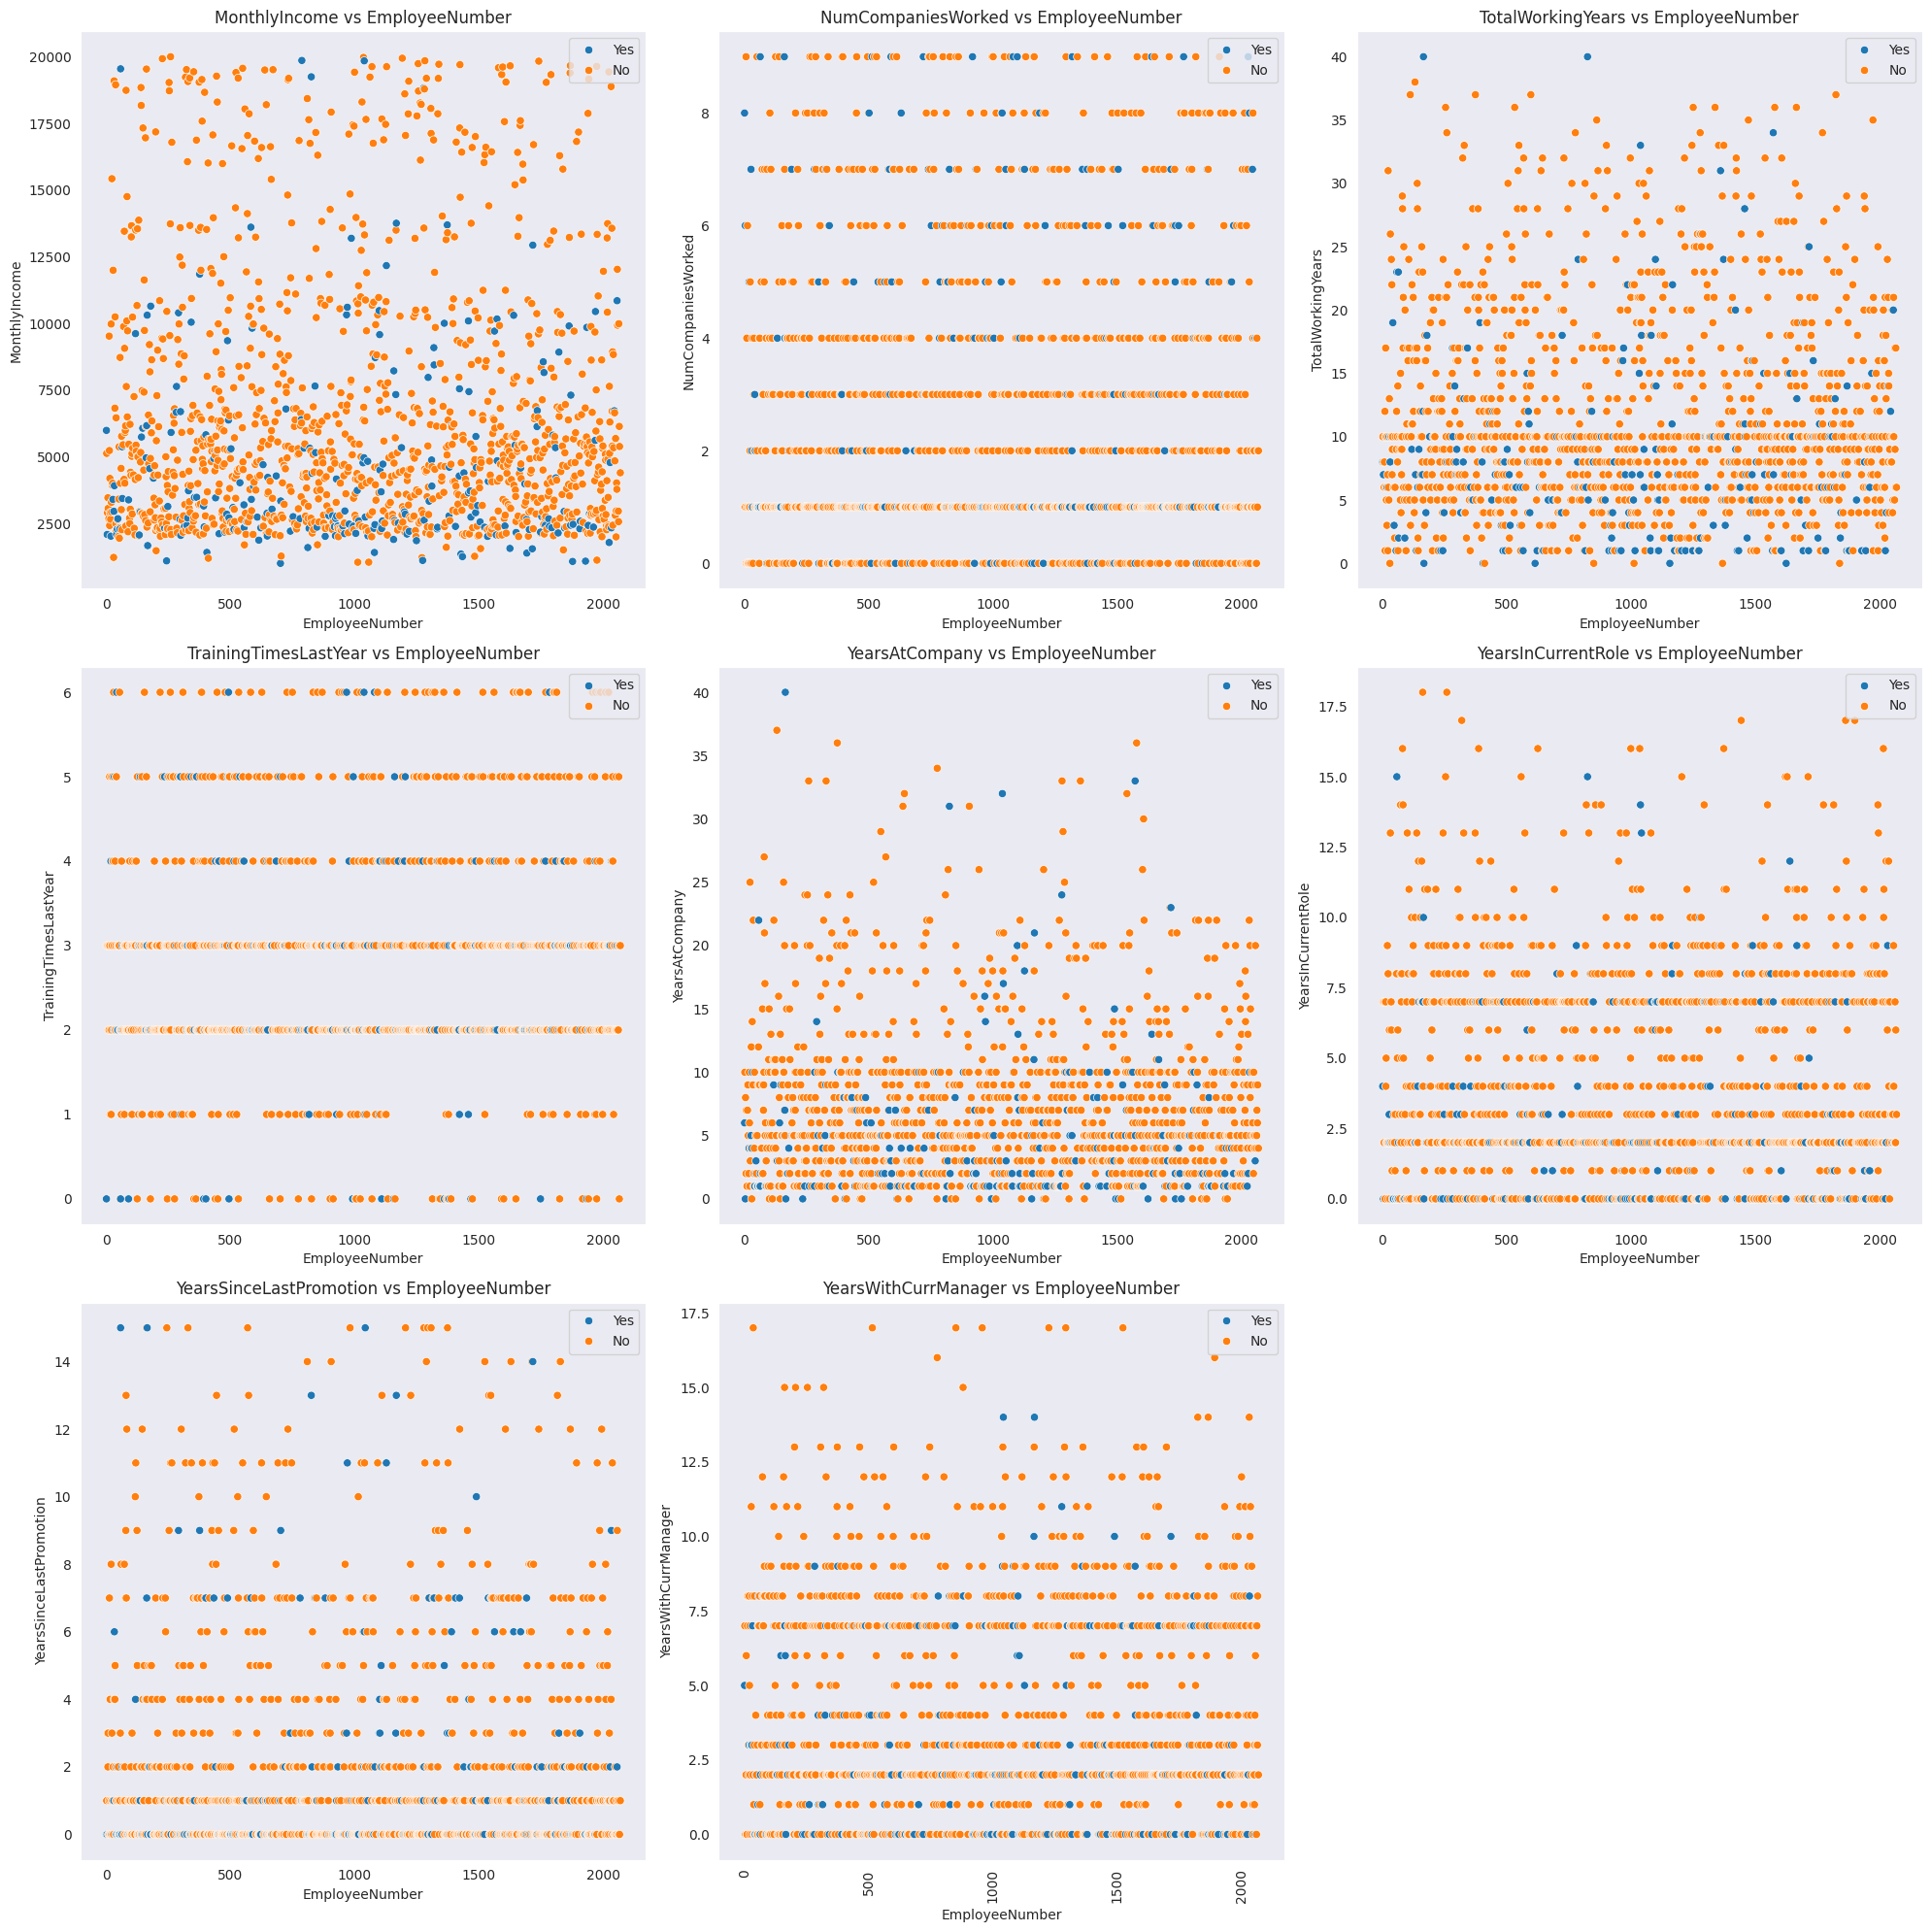

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the y variables
y_variables = ["MonthlyIncome", "NumCompaniesWorked", "TotalWorkingYears",
               "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole",
               "YearsSinceLastPromotion", "YearsWithCurrManager"]

# Calculate the number of rows and columns for subplots
num_rows = 3
num_cols = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# Loop over the y variables
for i, y_var in enumerate(y_variables):
    sns.scatterplot(data=df, x="EmployeeNumber", y=y_var, hue="Attrition", ax=axes[i])
    axes[i].set_title(f"{y_var} vs EmployeeNumber")
    axes[i].set_ylabel(y_var)
    axes[i].legend(loc="upper right")

# Hide empty subplots
for j in range(len(y_variables), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 500x1000 with 0 Axes>

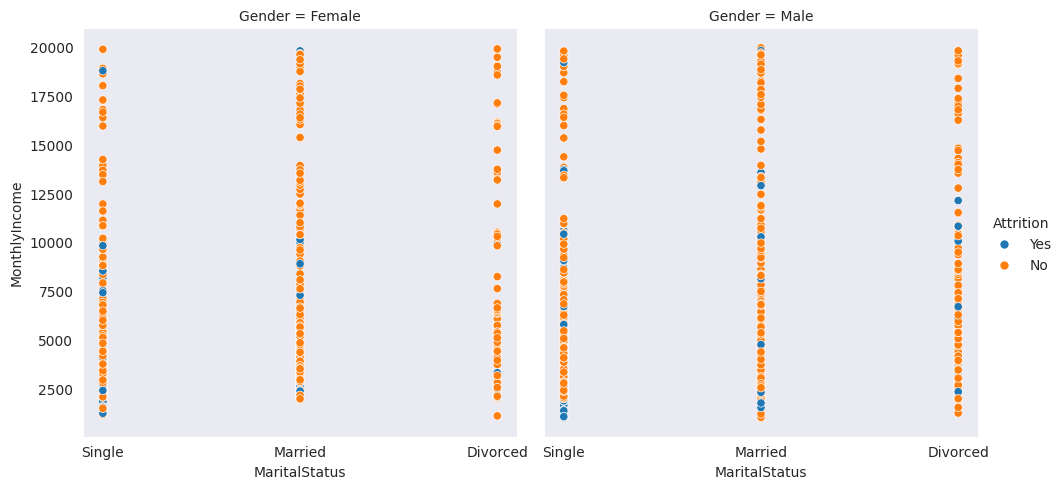

In [78]:
# MonthlyIncome vs MaritalStatus vs Attrition vs Gender
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

<Figure size 500x1000 with 0 Axes>

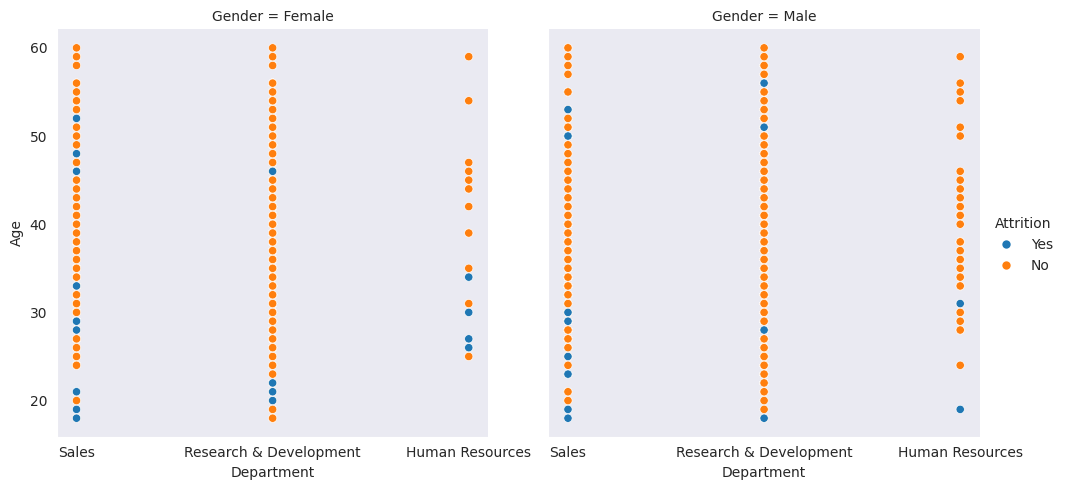

In [79]:
# Age vs Department vs Attrition vs Gender
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="Age", x="Department", hue="Attrition",col='Gender')
plt.show()

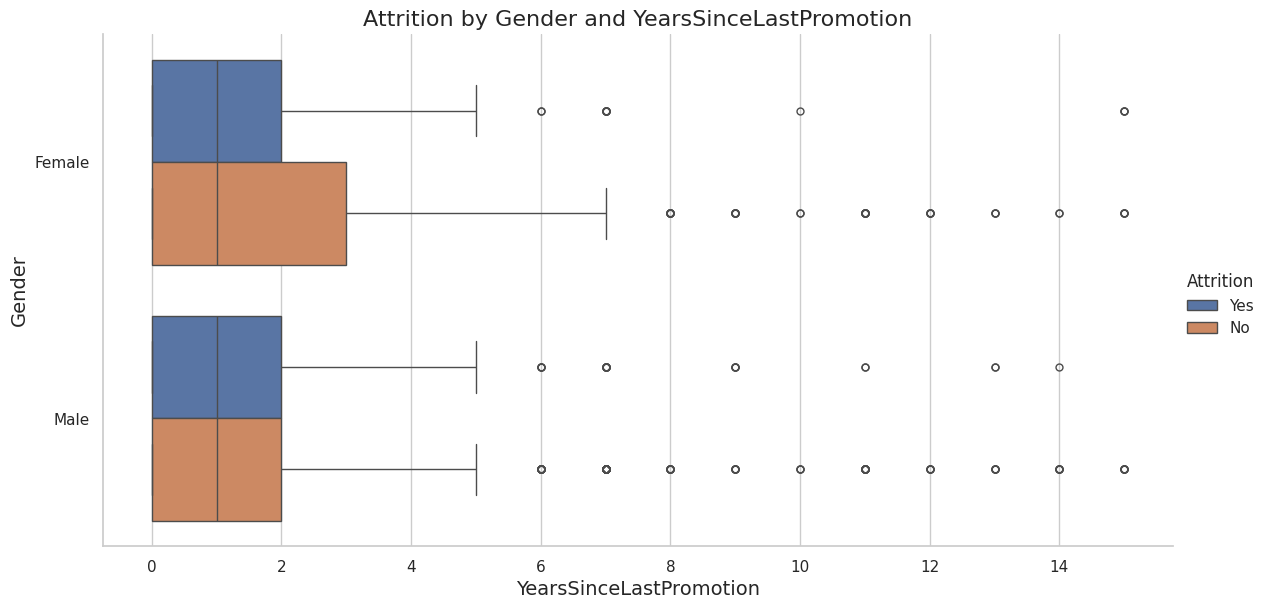

In [80]:
# Set the style
sns.set(style="whitegrid")

# Plot JobSatisfaction by Age and Attrition
sns.catplot(x="YearsSinceLastPromotion", y="Gender", hue="Attrition", data=df, kind="box", height=6, aspect=2)

# Set title and labels
plt.title('Attrition by Gender and YearsSinceLastPromotion', fontsize=16)
plt.xlabel('YearsSinceLastPromotion', fontsize=14)
plt.ylabel('Gender', fontsize=14)

# Show the plot
plt.show()


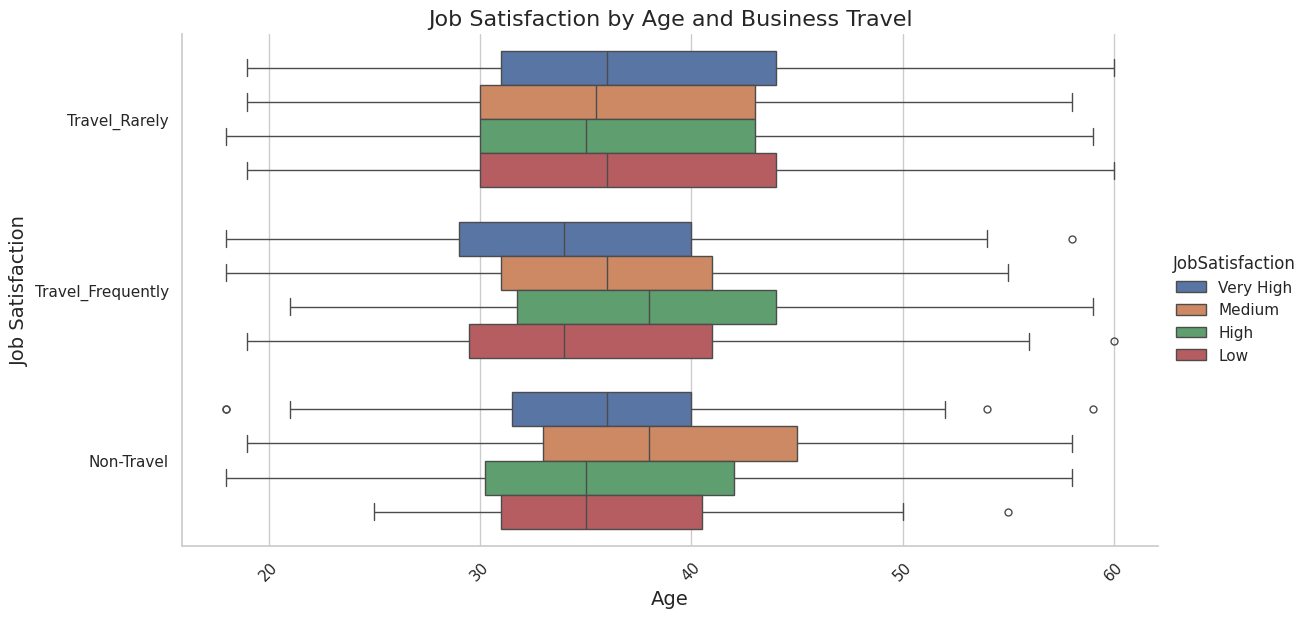

In [81]:
# Set the style
sns.set(style="whitegrid")

# Plot JobSatisfaction by Age and BusinessTravel
sns.catplot(x="Age", y="BusinessTravel", hue="JobSatisfaction", data=df, kind="box", height=6, aspect=2)

# Set title and labels
plt.title('Job Satisfaction by Age and Business Travel', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


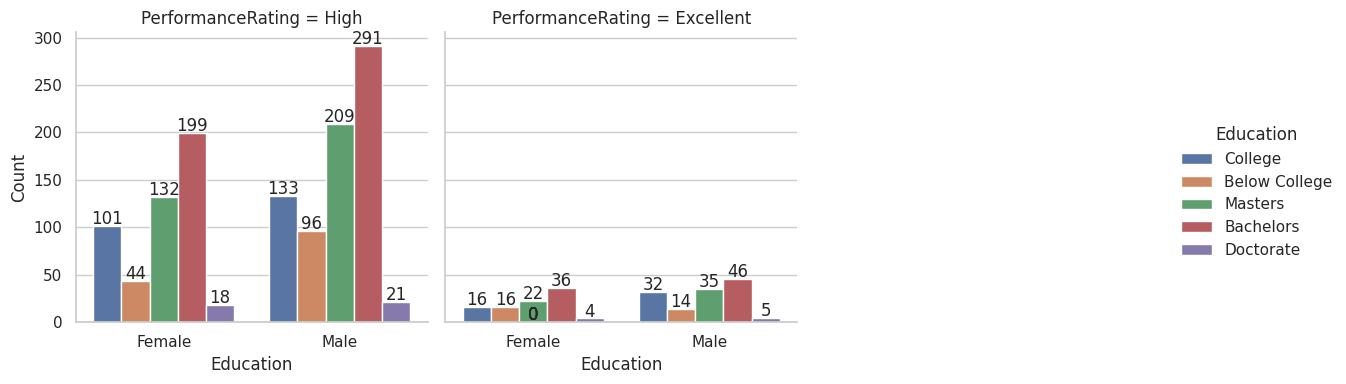

In [82]:
# Set the style
sns.set(style="whitegrid")

# Plot PerformanceRating by Education and Gender
plot = sns.catplot(x="Gender", hue="Education", data=df, kind="count", col="PerformanceRating", col_wrap=3, height=4, aspect=1)

# Set title and labels
plot.set_axis_labels("Education", "Count")

# Annotate counts on top of the bars
for ax in plot.axes.flatten():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

# Show the plot
plt.show()

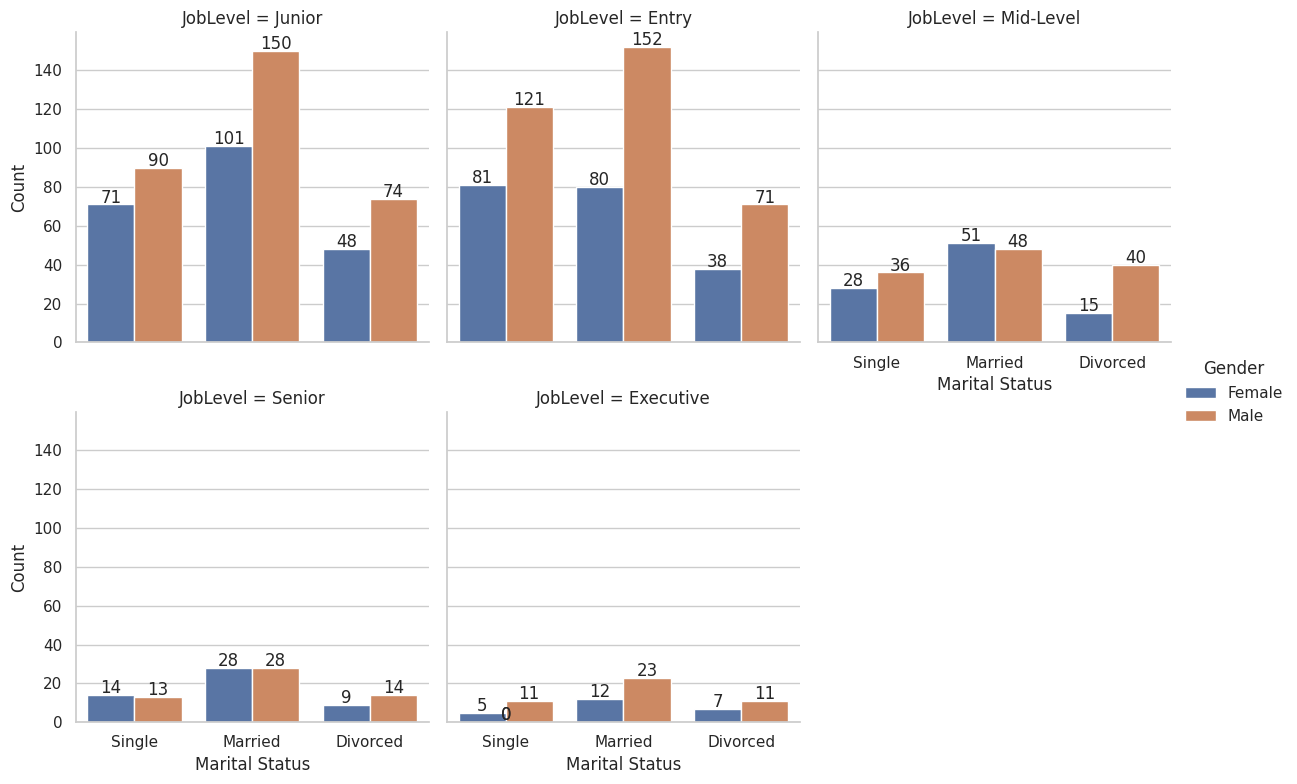

In [83]:
# MaritalStatus vs Gender vs JobLevel

# Set the style
sns.set(style="whitegrid")

# Plot JobLevel by Gender and MaritalStatus
plot = sns.catplot(x="MaritalStatus", hue="Gender", data=df, kind="count", col="JobLevel", col_wrap=3, height=4, aspect=1)

# Set title and labels
plot.set_axis_labels("Marital Status", "Count")

# Annotate counts on top of the bars
for ax in plot.axes.flatten():
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 5),
                    textcoords = 'offset points')

# Show the plot
plt.show()

In [84]:
#Checking summary statistics

In [85]:
df.describe().T

count          mean          std     min      25%  \
Age                      1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome         1470.0      9.192517     8.106864     1.0     2.00   
EmployeeCount            1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber           1470.0   1024.865306   602.024335     1.0   491.25   
HourlyRate               1470.0     65.891156    20.329428    30.0    48.00   
MonthlyIncome            1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate              1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked       1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike        1470.0     15.209524     3.659938    11.0    12.00   
StandardHours            1470.0     80.000000     0.000000    80.0    80.00   
TotalWorkingYears        1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear    1470.0      2.799320     1.289271     0.0     2.00   
YearsAtCompany           1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole       1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion  1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager     1470.0      4.123129     3.568136     0.0     2.00   

                             50%       75%      max  
Age                         36.0     43.00     60.0  
DailyRate                  802.0   1157.00   1499.0  
DistanceFromHome             7.0     14.00     29.0  
EmployeeCount                1.0      1.00      1.0  
EmployeeNumber            1020.5   1555.75   2068.0  
HourlyRate                  66.0     83.75    100.0  
MonthlyIncome             4919.0   8379.00  19999.0  
MonthlyRate              14235.5  20461.50  26999.0  
NumCompaniesWorked           2.0      4.00      9.0  
PercentSalaryHike           14.0     18.00     25.0  
StandardHours               80.0     80.00     80.0  
TotalWorkingYears           10.0     15.00     40.0  
TrainingTimesLastYear        3.0      3.00      6.0  
YearsAtCompany               5.0      9.00     40.0  
YearsInCurrentRole           3.0      7.00     18.0  
YearsSinceLastPromotion      1.0      3.00     15.0  
YearsWithCurrManager         3.0      7.00     17.0

In [86]:
#The correlation Matrix

In [87]:
df.corr(numeric_only=True)


Age  DailyRate  DistanceFromHome  EmployeeCount  \
Age                      1.000000   0.010661         -0.001686            NaN   
DailyRate                0.010661   1.000000         -0.004985            NaN   
DistanceFromHome        -0.001686  -0.004985          1.000000            NaN   
EmployeeCount                 NaN        NaN               NaN            NaN   
EmployeeNumber          -0.010145  -0.050990          0.032916            NaN   
HourlyRate               0.024287   0.023381          0.031131            NaN   
MonthlyIncome            0.497855   0.007707         -0.017014            NaN   
MonthlyRate              0.028051  -0.032182          0.027473            NaN   
NumCompaniesWorked       0.299635   0.038153         -0.029251            NaN   
PercentSalaryHike        0.003634   0.022704          0.040235            NaN   
StandardHours                 NaN        NaN               NaN            NaN   
TotalWorkingYears        0.680381   0.014515          0.004628            NaN   
TrainingTimesLastYear   -0.019621   0.002453         -0.036942            NaN   
YearsAtCompany           0.311309  -0.034055          0.009508            NaN   
YearsInCurrentRole       0.212901   0.009932          0.018845            NaN   
YearsSinceLastPromotion  0.216513  -0.033229          0.010029            NaN   
YearsWithCurrManager     0.202089  -0.026363          0.014406            NaN   

                         EmployeeNumber  HourlyRate  MonthlyIncome  \
Age                           -0.010145    0.024287       0.497855   
DailyRate                     -0.050990    0.023381       0.007707   
DistanceFromHome               0.032916    0.031131      -0.017014   
EmployeeCount                       NaN         NaN            NaN   
EmployeeNumber                 1.000000    0.035179      -0.014829   
HourlyRate                     0.035179    1.000000      -0.015794   
MonthlyIncome                 -0.014829   -0.015794       1.000000   
MonthlyRate                    0.012648   -0.015297       0.034814   
NumCompaniesWorked            -0.001251    0.022157       0.149515   
PercentSalaryHike             -0.012944   -0.009062      -0.027269   
StandardHours                       NaN         NaN            NaN   
TotalWorkingYears             -0.014365   -0.002334       0.772893   
TrainingTimesLastYear          0.023603   -0.008548      -0.021736   
YearsAtCompany                -0.011240   -0.019582       0.514285   
YearsInCurrentRole            -0.008416   -0.024106       0.363818   
YearsSinceLastPromotion       -0.009019   -0.026716       0.344978   
YearsWithCurrManager          -0.009197   -0.020123       0.344079   

                         MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
Age                         0.028051            0.299635           0.003634   
DailyRate                  -0.032182            0.038153           0.022704   
DistanceFromHome            0.027473           -0.029251           0.040235   
EmployeeCount                    NaN                 NaN                NaN   
EmployeeNumber              0.012648           -0.001251          -0.012944   
HourlyRate                 -0.015297            0.022157          -0.009062   
MonthlyIncome               0.034814            0.149515          -0.027269   
MonthlyRate                 1.000000            0.017521          -0.006429   
NumCompaniesWorked          0.017521            1.000000          -0.010238   
PercentSalaryHike          -0.006429           -0.010238           1.000000   
StandardHours                    NaN                 NaN                NaN   
TotalWorkingYears           0.026442            0.237639          -0.020608   
TrainingTimesLastYear       0.001467           -0.066054          -0.005221   
YearsAtCompany             -0.023655           -0.118421          -0.035991   
YearsInCurrentRole         -0.012815           -0.090754          -0.001520   
YearsSinceLastPromotion     0.001567          

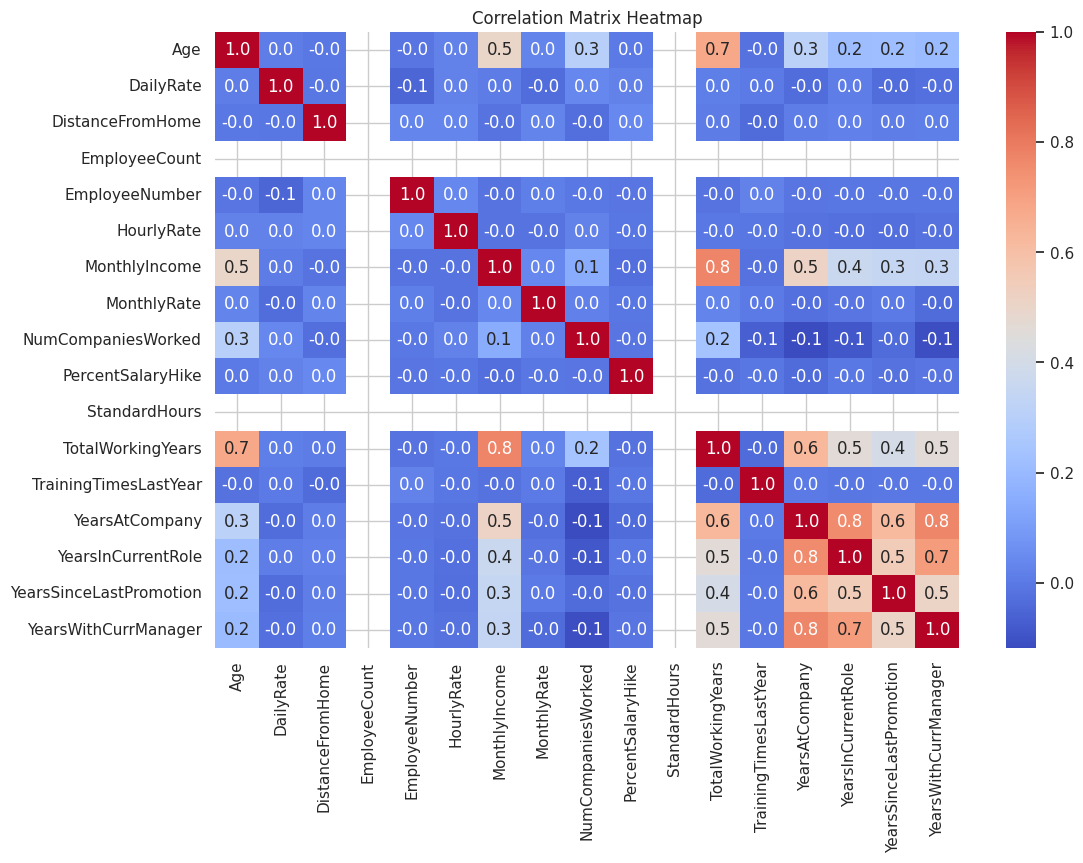

In [88]:
# Plot correlation matrix heatmap to compare the relationship between input variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Feature selection

In [89]:
#Removing irrelevant variables
df=df.drop(['StandardHours','EmployeeCount', 'EmployeeNumber', 'Over18'] , axis=1)

In [90]:
# Remove elements if they exist in the lists
if 'EmployeeCount' in numerical_features:
    numerical_features.remove('EmployeeCount')

if 'StandardHours' in numerical_features:
    numerical_features.remove('StandardHours')

if 'EmployeeNumber' in numerical_features:
    numerical_features.remove('EmployeeNumber')

if 'Over18' in categorical_features:
    categorical_features.remove('Over18')

In [91]:
# ANOVA F-test Feature Selection for ( Numerical Input, Categorical Output)

In [92]:
#Identify the target variable
y = df['Attrition']

In [93]:
num_select_X=df[numerical_features]

num_select_X.columns,y

(Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 0       Yes
 1        No
 2       Yes
 3        No
 4        No
        ... 
 1465     No
 1466     No
 1467     No
 1468     No
 1469     No
 Name: Attrition, Length: 1470, dtype: object)

### Applying ANOVA F-test

In [94]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [95]:
# split into train and test sets using subset of features
X_train, X_test, y_train, y_test = train_test_split(num_select_X, y, test_size=0.25, random_state=42)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [96]:
#The dataframe of resulting feature importance

In [97]:
# Create the feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': num_select_X.columns, 'Score': fs.scores_})

# Sort the DataFrame by 'Score' in descending order
feature_importance_df = feature_importance_df.sort_values(by='Score', ascending=False)

# Reset index and drop the old index column
feature_importance_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(feature_importance_df)

                    Feature      Score
0        YearsInCurrentRole  40.864694
1         TotalWorkingYears  39.130242
2             MonthlyIncome  32.721340
3      YearsWithCurrManager  31.894762
4                       Age  31.104330
5            YearsAtCompany  23.703454
6        NumCompaniesWorked   4.681376
7          DistanceFromHome   4.380866
8     TrainingTimesLastYear   3.629371
9   YearsSinceLastPromotion   2.865066
10                DailyRate   2.157048
11              MonthlyRate   0.133992
12        PercentSalaryHike   0.051197
13               HourlyRate   0.038903


In [98]:

# Visualize feature Importance Scores of the numerical features
# create trace
trace = go.Bar(x=num_select_X.columns, y=fs.scores_)

# create layout
layout = go.Layout(title='Feature Importance Scores of the numerical features', xaxis=dict(tickangle=-45))

# create figure
fig = go.Figure(data=[trace], layout=layout)

# update figure size
fig.update_layout(width=800, height=500)

# show figure
fig.show()

### Applying Chi-Squared test (Categorical Input vs Categorical Output) Beginning with encoding

In [99]:
#Feature engineering

In [100]:
encoded_X=df[categorical_features].drop('Attrition', axis=1)
encoded_X

BusinessTravel              Department      Education EducationField  \
0         Travel_Rarely                   Sales        College  Life Sciences   
1     Travel_Frequently  Research & Development  Below College  Life Sciences   
2         Travel_Rarely  Research & Development        College          Other   
3     Travel_Frequently  Research & Development        Masters  Life Sciences   
4         Travel_Rarely  Research & Development  Below College        Medical   
...                 ...                     ...            ...            ...   
1465  Travel_Frequently  Research & Development        College        Medical   
1466      Travel_Rarely  Research & Development  Below College        Medical   
1467      Travel_Rarely  Research & Development      Bachelors  Life Sciences   
1468  Travel_Frequently                   Sales      Bachelors        Medical   
1469      Travel_Rarely  Research & Development      Bachelors        Medical   

     EnvironmentSatisfaction  Gender JobInvolvement   JobLevel  \
0                     Medium  Female           High     Junior   
1                       High    Male         Medium     Junior   
2                  Very High    Male         Medium      Entry   
3                  Very High  Female           High      Entry   
4                        Low    Male           High      Entry   
...                      ...     ...            ...        ...   
1465                    High    Male      Very High     Junior   
1466               Very High    Male         Medium  Mid-Level   
1467                  Medium    Male      Very High     Junior   
1468               Very High    Male         Medium     Junior   
1469                  Medium    Male      Very High     Junior   

                        JobRole JobSatisfaction MaritalStatus OverTime  \
0               Sales Executive       Very High        Single      Yes   
1            Research Scientist          Medium       Married       No   
2         Laboratory Technician            High        Single      Yes   
3            Research Scientist            High       Married      Yes   
4         Laboratory Technician          Medium       Married       No   
...                         ...             ...           ...      ...   
1465      Laboratory Technician       Very High       Married       No   
1466  Healthcare Representative             Low       Married       No   
1467     Manufacturing Director          Medium       Married      Yes   
1468            Sales Executive          Medium       Married       No   
1469      Laboratory Technician            High       Married       No   

     PerformanceRating RelationshipSatisfaction             StockOptionLevel  \
0                 High         Low satisfaction             No stock options   
1            Excellent   Very high satisfaction  Stock options at a discount   
2                 High      Medium satisfaction             No stock options   
3                 High        high satisfaction             No stock options   
4                 High   Very high satisfaction  Stock options at a discount   
...                ...                      ...                          ...   
1465              High        high satisfaction  Stock options at a discount   
1466              High         Low satisfaction  Stock options at a discount   
1467         Excellent      Medium satisfaction  Stock options at a discount   
1468              High   Very high satisfaction             No stock options   
1469              High         Low satisfaction             No stock options   

       WorkLifeBalance  
0        Not satisfied  
1       Very satisfied  
2       Very satisfied  
3       Very satisfied  
4       Very satisfied  
...                ...  
1465    Very satisfied  
1466    Very satisfied  
1467    Very satisfied  
1468         Satisfied  
1469  Highly satisfied  

[1470 rows x 16 columns]

In [101]:

# create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# define the columns to encode
cols_to_encode = ['EnvironmentSatisfaction', 'Education', 'JobInvolvement', 'BusinessTravel', 'JobSatisfaction',
                  'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel', 'StockOptionLevel', 'PerformanceRating']

# fit the encoder to the data
encoder.fit(encoded_X[cols_to_encode])

# transform the specified columns
encoded_X[cols_to_encode] = encoder.transform(encoded_X[cols_to_encode])


In [102]:
# create an instance of the One hot encoding

# define the columns to one-hot encode
cols_to_encode = ['Gender', 'OverTime' ]

# perform one-hot encoding
encoded_cols = pd.get_dummies(encoded_X[cols_to_encode])

# concatenate the encoded columns with the original dataset
encoded_X = pd.concat([encoded_X, encoded_cols], axis=1)

# drop the original columns that have been encoded
encoded_X.drop(cols_to_encode, axis=1, inplace=True)


In [103]:

# Using LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to label encode
cols_to_label_encode = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Apply label encoding to each column
for col in cols_to_label_encode:
    encoded_X[col] = label_encoder.fit_transform(encoded_X[col])

# Display the updated DataFrame
encoded_X.head()

BusinessTravel  Department  Education  EducationField  \
0             2.0           2        2.0               1   
1             1.0           1        1.0               1   
2             2.0           1        2.0               4   
3             1.0           1        4.0               1   
4             2.0           1        1.0               3   

   EnvironmentSatisfaction  JobInvolvement  JobLevel  JobRole  \
0                      2.0             0.0       2.0        7   
1                      0.0             2.0       2.0        6   
2                      3.0             2.0       0.0        2   
3                      3.0             0.0       0.0        6   
4                      1.0             0.0       0.0        2   

   JobSatisfaction  MaritalStatus  PerformanceRating  \
0              3.0              2                1.0   
1              2.0              1                0.0   
2              0.0              2                1.0   
3              0.0              1                1.0   
4              2.0              1                1.0   

   RelationshipSatisfaction  StockOptionLevel  WorkLifeBalance  Gender_Female  \
0                       0.0               0.0              1.0              1   
1                       2.0               1.0              3.0              0   
2                       1.0               0.0              3.0              0   
3                       3.0               0.0              3.0              1   
4                       2.0               1.0              3.0              0   

   Gender_Male  OverTime_No  OverTime_Yes  
0            0            0             1  
1            1            1             0  
2            1            0             1  
3            0            0             1  
4            1            1             0

In [104]:
# Applying Chi-Squared test
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(encoded_X, y)

encoded_X_copy=encoded_X.copy()
encoded_X = fs.transform(encoded_X)

In [105]:
# Creating feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': encoded_X_copy.columns, 'Score': fs.scores_})

# Sort the DataFrame by feature importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Score', ascending=False)

# Add a column for the index starting from 0
feature_importance_df.reset_index(drop=True, inplace=True)

# Print the resulting dataframe
print(feature_importance_df)

                     Feature      Score
0               OverTime_Yes  63.845067
1                   JobLevel  58.268745
2           StockOptionLevel  25.268826
3                OverTime_No  25.198812
4              MaritalStatus  18.745657
5                    JobRole   9.004448
6            JobSatisfaction   6.692900
7                  Education   3.108840
8            WorkLifeBalance   2.442267
9   RelationshipSatisfaction   1.695992
10                Department   1.329297
11   EnvironmentSatisfaction   0.867333
12            EducationField   0.834912
13             Gender_Female   0.765130
14               Gender_Male   0.510087
15            JobInvolvement   0.149139
16         PerformanceRating   0.001886
17            BusinessTravel   0.000002


In [106]:

# Plot feature importance
trace = go.Bar(x=list(encoded_X_copy.columns), y=fs.scores_)

# create layout
layout = go.Layout(title='Feature Importance Scores of the categorical features', xaxis=dict(tickangle=-45))

# create figure
fig = go.Figure(data=[trace], layout=layout)

# update figure size
fig.update_layout(width=1200, height=900)

# show figure
fig.show()

In [129]:
#Concat the encoded Features with the numerical features
X = pd.concat([encoded_X_copy, num_select_X], axis=1)
X

BusinessTravel  Department  Education  EducationField  \
0                2.0           2        2.0               1   
1                1.0           1        1.0               1   
2                2.0           1        2.0               4   
3                1.0           1        4.0               1   
4                2.0           1        1.0               3   
...              ...         ...        ...             ...   
1465             1.0           1        2.0               3   
1466             2.0           1        1.0               3   
1467             2.0           1        0.0               1   
1468             1.0           2        0.0               3   
1469             2.0           1        0.0               3   

      EnvironmentSatisfaction  JobInvolvement  JobLevel  JobRole  \
0                         2.0             0.0       2.0        7   
1                         0.0             2.0       2.0        6   
2                         3.0             2.0       0.0        2   
3                         3.0             0.0       0.0        6   
4                         1.0             0.0       0.0        2   
...                       ...             ...       ...      ...   
1465                      0.0             3.0       2.0        2   
1466                      3.0             2.0       3.0        0   
1467                      2.0             3.0       2.0        4   
1468                      3.0             2.0       2.0        7   
1469                      2.0             3.0       2.0        2   

      JobSatisfaction  MaritalStatus  ...  MonthlyIncome  MonthlyRate  \
0                 3.0              2  ...           5993        19479   
1                 2.0              1  ...           5130        24907   
2                 0.0              2  ...           2090         2396   
3                 0.0              1  ...           2909        23159   
4                 2.0              1  ...           3468        16632   
...               ...            ...  ...            ...          ...   
1465              3.0              1  ...           2571        12290   
1466              1.0              1  ...           9991        21457   
1467              2.0              1  ...           6142         5174   
1468              2.0              1  ...           5390        13243   
1469              0.0              1  ...           4404        10228   

      NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0                      8                 11                  8   
1                      1                 23                 10   
2                      6                 15                  7   
3                      1                 11                  8   
4                      9                 12                  6   
...                  ...                ...                ...   
1465                   4                 17                 17   
1466                   4                 15                  9   
1467                   1                 20                  6   
1468                   2                 14                 17   
1469                   2                 12                  6   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                         0               6                   4   
1                         3              10                   7   
2                         3               0                   0   
3                         3               8                   7   
4                         3               2                   2   
...                     ...             ...                 ...   
1465                      3               5                   2   
1466                      5               7                   7   
1467                      0               6                   2   
1468                      3               9                   6   
1469                     

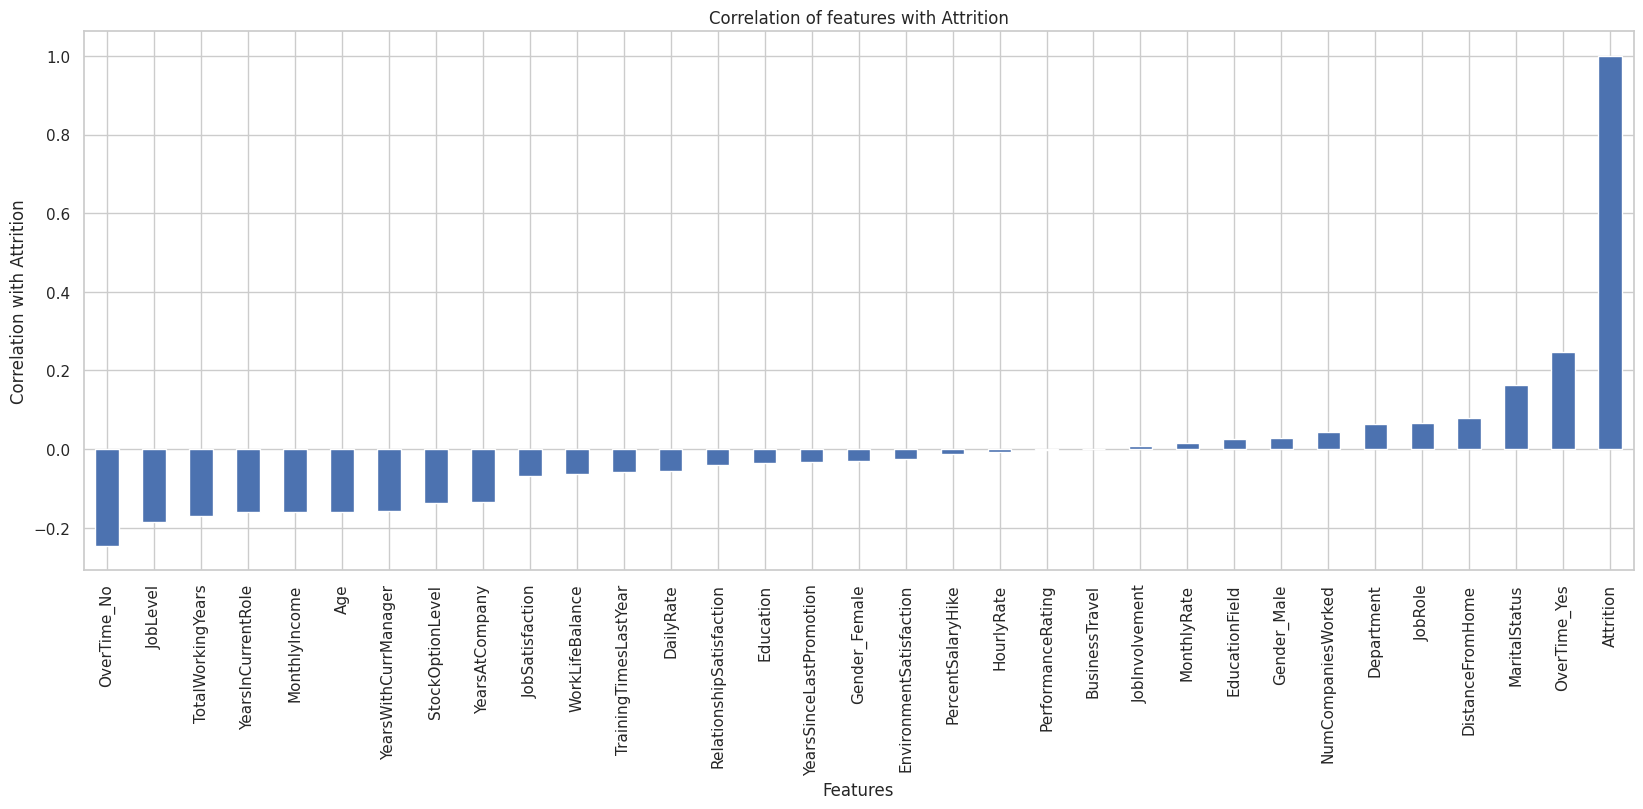

In [131]:
# Confirming feature importance

#Combine X and y into a DataFrame
df_combined = pd.concat([X, pd.DataFrame(y, columns=['Attrition'])], axis=1)

# Calculate correlations
correlations = df_combined.corr()

# Plot the correlation of features with 'Attrition'
plt.figure(figsize=(20, 7))
correlations['Attrition'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with Attrition')
plt.title('Correlation of features with Attrition')
plt.show()

### Handling imbalanced data

In [109]:
# Checking for Oversampling


In [110]:
#Show the Target classes before appling SMOTE
print(pd.Series(y).value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


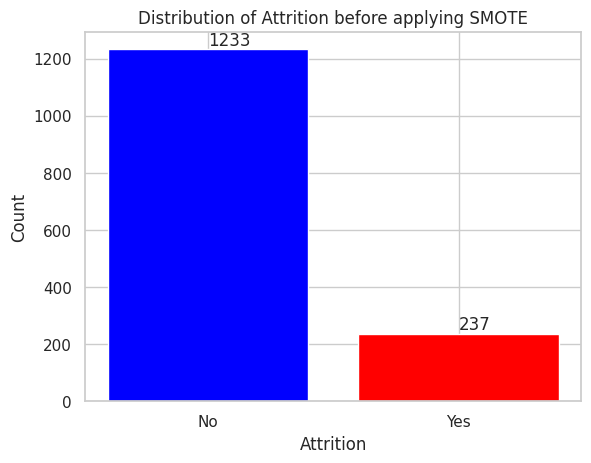

In [111]:
# Assuming 'y' represents the target variable after applying SMOTE
attrition_counts = pd.Series(y).value_counts()

# Define colors for each category
colors = ['blue', 'red']

# Plot the bar plot using matplotlib
bars = plt.bar(attrition_counts.index, attrition_counts, color=colors)

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition before applying SMOTE')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Show the plot
plt.show()

In [112]:
# transform the dataset by applying SMOTE

oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)

print(pd.Series(y).value_counts())

Yes    1233
No     1233
Name: Attrition, dtype: int64


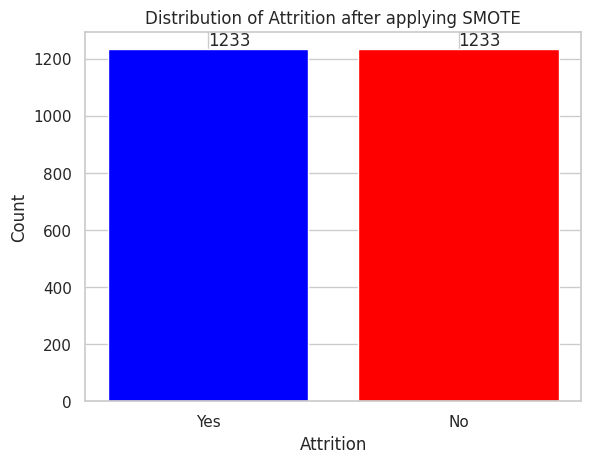

In [113]:
#Show the Target classes after applying SMOTE

# Assuming 'y' represents the target variable after applying SMOTE
attrition_counts = pd.Series(y).value_counts()

# Define colors for each category
colors = ['blue', 'red']

# Plot the bar plot using matplotlib
bars = plt.bar(attrition_counts.index, attrition_counts, color=colors)

# Add labels and title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Distribution of Attrition after applying SMOTE')

# Add counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Show the plot
plt.show()


In [114]:
# encoding target variable with Label Encoder

le = LabelEncoder()
y= le.fit_transform(y)

y

array([1, 0, 1, ..., 1, 1, 1])

In [115]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Scaling

In [116]:
#Scaling and making the data assume normal distribution
# Power transformation
power_transformer = PowerTransformer(method='yeo-johnson')
X_train = power_transformer.fit_transform(X_train)
X_test = power_transformer.transform(X_test)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

Training Accuracy: 100.00%
Test Accuracy: 93.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       311
           1       0.98      0.88      0.93       306

    accuracy                           0.93       617
   macro avg       0.94      0.93      0.93       617
weighted avg       0.94      0.93      0.93       617



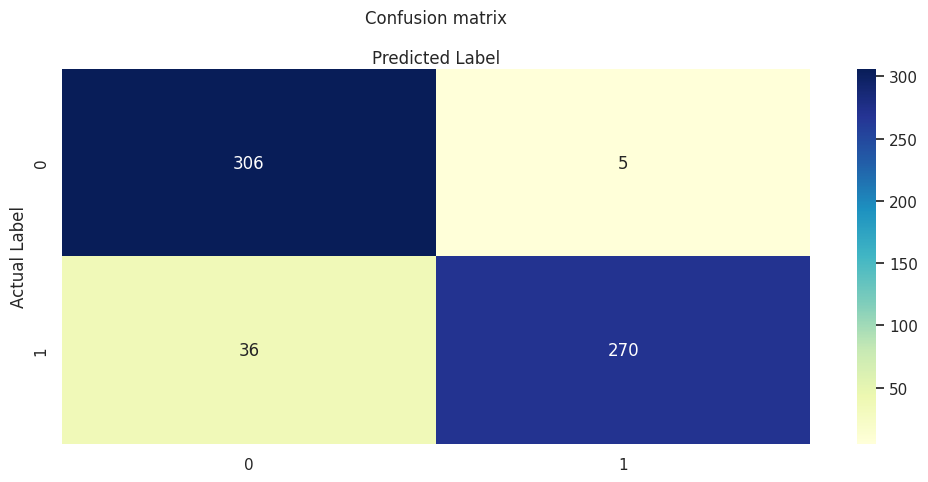

In [117]:
RF_classifier = RandomForestClassifier(random_state=42)
RF_classifier.fit(X_train, y_train)

# Predictions on training data
train_predictions = RF_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predictions on test data
RF_y_pred = RF_classifier.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_y_pred)

# Print the accuracies
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(RF_accuracy * 100))

# Compute the classification report
RF_report = classification_report(y_test, RF_y_pred)
print("\nClassification Report:")
print(RF_report)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(metrics.confusion_matrix(y_test, RF_y_pred), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Training Accuracy: 87.29%
Test Accuracy: 86.55%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       311
           1       0.91      0.81      0.86       306

    accuracy                           0.87       617
   macro avg       0.87      0.87      0.87       617
weighted avg       0.87      0.87      0.87       617



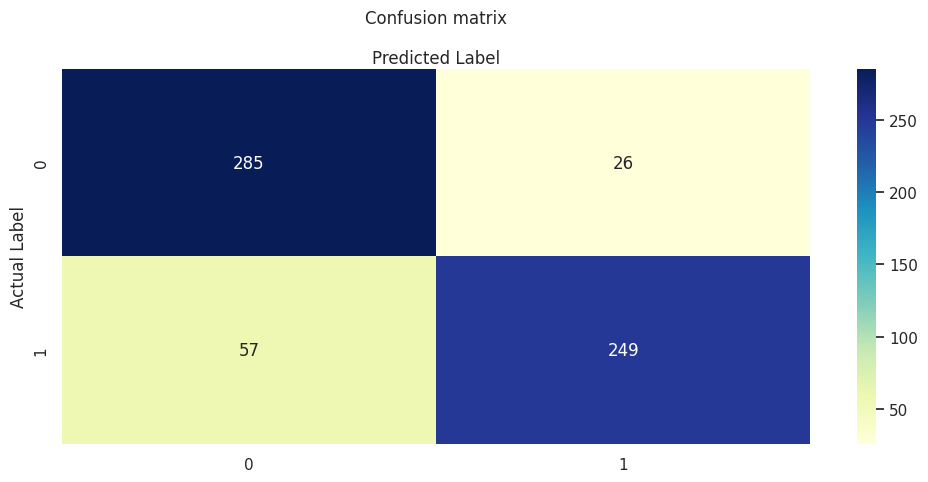

In [118]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

# Predictions on training data
train_predictions = logistic_regression.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predictions on test data
logistic_y_pred = logistic_regression.predict(X_test)
LG_accuracy = accuracy_score(y_test, logistic_y_pred)

# Print the accuracies
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(LG_accuracy * 100))

# Compute the classification report
logistic_report = classification_report(y_test, logistic_y_pred)
print("\nClassification Report:")
print(logistic_report)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(metrics.confusion_matrix(y_test, logistic_y_pred), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Training Accuracy: 96.05%
Test Accuracy: 91.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       311
           1       0.96      0.86      0.91       306

    accuracy                           0.91       617
   macro avg       0.92      0.91      0.91       617
weighted avg       0.92      0.91      0.91       617



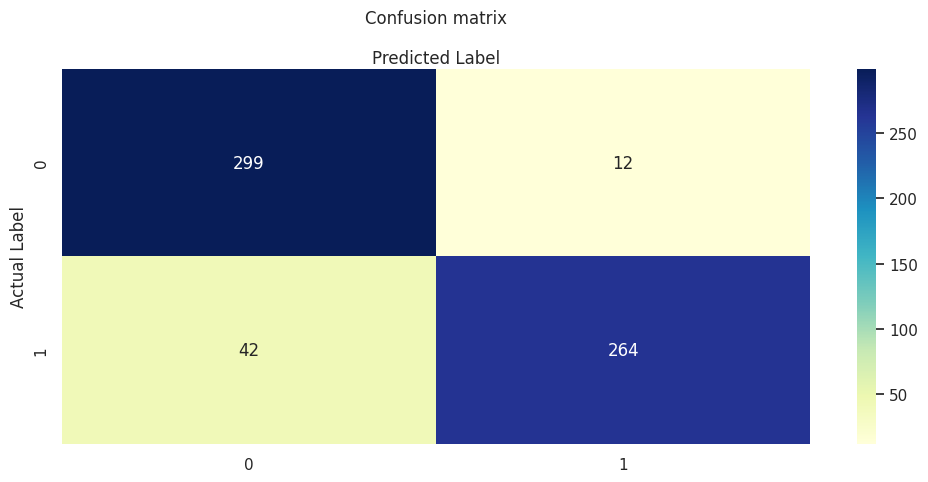

In [119]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Predictions on training data
train_predictions = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predictions on test data
svm_y_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

# Print the accuracies
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(svm_accuracy * 100))

# Compute the classification report
svm_report = classification_report(y_test, svm_y_pred)
print("\nClassification Report:")
print(svm_report)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(metrics.confusion_matrix(y_test, svm_y_pred), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Training Accuracy: 100.00%
Test Accuracy: 95.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       311
           1       0.97      0.93      0.95       306

    accuracy                           0.95       617
   macro avg       0.95      0.95      0.95       617
weighted avg       0.95      0.95      0.95       617



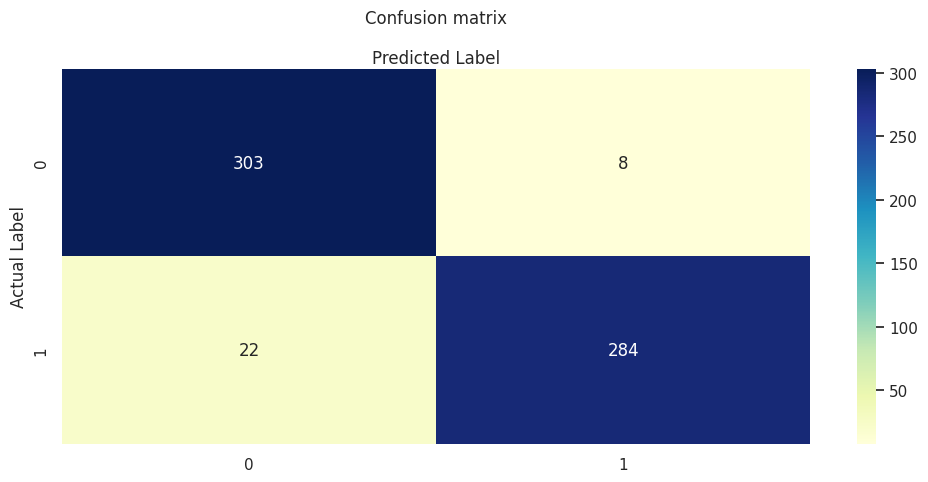

In [120]:
extra_tree_classifier = ExtraTreesClassifier(random_state=42)
extra_tree_classifier.fit(X_train, y_train)

# Predictions on training data
train_predictions = extra_tree_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Predictions on test data
extra_tree_y_pred = extra_tree_classifier.predict(X_test)
ET_accuracy = accuracy_score(y_test, extra_tree_y_pred)

# Print the accuracies
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(ET_accuracy * 100))

# Compute the classification report
extra_tree_report = classification_report(y_test, extra_tree_y_pred)
print("\nClassification Report:")
print(extra_tree_report)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(metrics.confusion_matrix(y_test, extra_tree_y_pred), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [121]:
# Print test accuracies
print("SVM Accuracy:", svm_accuracy)
print("Extra Trees Accuracy:", ET_accuracy)
print("Logistic Regression Accuracy:", LG_accuracy)
print("Random Forest Accuracy:", RF_accuracy)

SVM Accuracy: 0.9124797406807131
Extra Trees Accuracy: 0.9513776337115073
Logistic Regression Accuracy: 0.8654781199351702
Random Forest Accuracy: 0.93354943273906


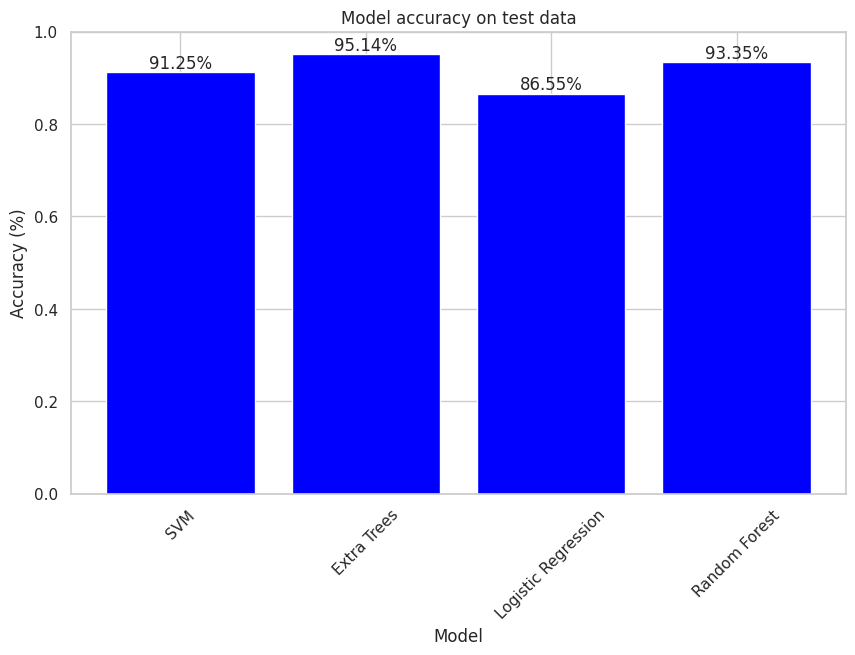

In [122]:
# Visualize accuracies
model_names = ['SVM', 'Extra Trees', 'Logistic Regression', 'Random Forest']
accuracies = [svm_accuracy, ET_accuracy, LG_accuracy, RF_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='blue')
plt.title('Model accuracy on test data')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add accuracy values with percentage signs on top of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc * 100:.2f}%',
             ha='center', va='bottom')

plt.show()

## Validating model result with k-fold cross-validation (CV=5)

In [123]:
# k-fold cross-validation for Random Forest model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
RF_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores_RF = cross_val_score(RF_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores_RF)

# Compute and print the mean accuracy
mean_accuracy_RF = cv_scores_RF.mean()
print("Mean Accuracy:", mean_accuracy_RF)

Cross-validation Scores: [0.92432432 0.93513514 0.92972973 0.91621622 0.90243902]
Mean Accuracy: 0.9215688859591298


In [124]:
# k-fold cross-validation for Logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression classifier
log_reg_classifier = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores_LG = cross_val_score(log_reg_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores_LG)

# Compute and print the mean accuracy
mean_accuracy_LG = cv_scores_LG.mean()
print("Mean Accuracy:", mean_accuracy_LG)

Cross-validation Scores: [0.89459459 0.87027027 0.86216216 0.85945946 0.84823848]
Mean Accuracy: 0.8669449937742619


In [125]:
#k-fold Cross validation for support vector machine


# Create the Support Vector Classifier
svm_classifier = SVC(random_state=42)

# Perform cross-validation
cv_scores_SVM = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores_SVM)

# Compute and print the mean accuracy
mean_accuracy_SVM = cv_scores_SVM.mean()
print("Mean Accuracy:", mean_accuracy_SVM)

Cross-validation Scores: [0.91891892 0.9027027  0.92702703 0.90810811 0.88888889]
Mean Accuracy: 0.9091291291291291


In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

# Create the Extra Trees Classifier
ET_classifier = ExtraTreesClassifier(random_state=42)

# Perform cross-validation
cv_scores_ET = cross_val_score(ET_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation Scores:", cv_scores_ET)

# Compute and print the mean accuracy
mean_accuracy_ET = cv_scores_ET.mean()
print("Mean Accuracy:", mean_accuracy_ET)

Cross-validation Scores: [0.93243243 0.93513514 0.94594595 0.91891892 0.92411924]
Mean Accuracy: 0.9313103347249688


In [127]:
# Print k-fold cross-validation results accuracies
print("SVM Cross-validation Accuracy:", mean_accuracy_SVM)
print("Extra Trees Cross-validation Accuracy:", mean_accuracy_ET)
print("Logistic Regression Cross-validation Accuracy:", mean_accuracy_LG)
print("Random Forest Cross-validation Accuracy:", mean_accuracy_RF)

SVM Cross-validation Accuracy: 0.9091291291291291
Extra Trees Cross-validation Accuracy: 0.9313103347249688
Logistic Regression Cross-validation Accuracy: 0.8669449937742619
Random Forest Cross-validation Accuracy: 0.9215688859591298


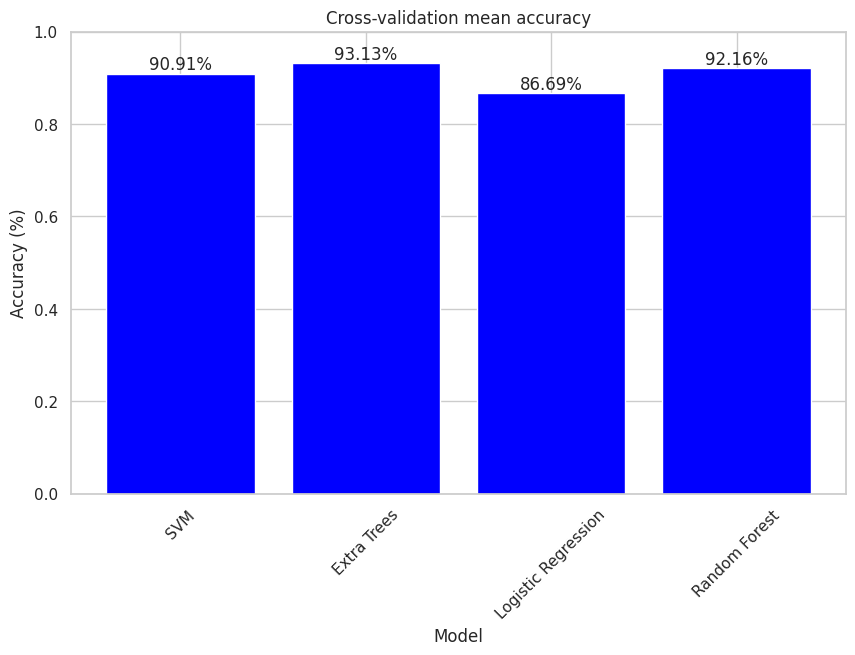

In [128]:
cv_model_names = ['SVM', 'Extra Trees', 'Logistic Regression', 'Random Forest']
cv_accuracies = [mean_accuracy_SVM, mean_accuracy_ET, mean_accuracy_LG, mean_accuracy_RF]

plt.figure(figsize=(10, 6))
bars = plt.bar(cv_model_names, cv_accuracies, color='blue')
plt.title('Cross-validation mean accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add accuracy values with percentage signs on top of each bar
for bar, acc in zip(bars, cv_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{acc * 100:.2f}%',
             ha='center', va='bottom')

plt.show()